The following insights are expected from this project.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This 
will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis

In [184]:
# importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Business Case 
- employee performance analysis

# Domain analysis

- EmpNumber :Its a unique code that will be assigned to each employer of a company
- Age : age of a employes
- Gender : Gender of the employes (eg : male or female)
- EducationBackground : refers to the all formal and informal education done by the employee or level of education
- MaritalStatus : refers to the marital status of the employers
- EmpDepartment : Its an organization dealing with the matters involving the employees as hiring , traing 
- EmpJobRole : refers to the major duty of the employee
- BusinessTravelFrequency : refers to the Freuency of business travel
- DistanceFromHome : Distance between employees home and workplace 
- EmpEducationLevel : refers to the level of education completed
- EmpEnvironmentSatisfaction : Employees satisfaction with the work environment 
- EmpHourlyRate : Employee hourly wage (compensation)
- EmpJobInvolvement : Level of employees involment in their job (Engagment)
- EmpJobLevel : job level or position in the organization
- EmpJobSatisfaction : employees satisfaction with their job
- NumCompaniesWorked : The number of companies that the emplye has worked for
- OverTime : Whether the employee works overtime
- EmpLastSalaryHikePercent : Percentage of the salary hike
- EmpRelationshipSatisfaction : Employee satisfaction with their relationships at work 
- TotalWorkExperienceInYears : Total years of work experience
- TrainingTimesLastYear : Number of training sessions attended last year
- EmpWorkLifeBalance : Employees perception of their work-life balance
- ExperienceYearsAtThisCompany : Number of Years the employee has been with the company
- ExperienceYearsInCurrentRole : Number of years the employee has been in their current role
- YearsSinceLastPromotion : Years since the employee last promotion
- YearsWithCurrManager : Number of years the employee has worked with their current manager
- Attrition : Whether the employee has left the company or not 
- PerformanceRating : Employee performace rating 

In [185]:
data = pd.read_excel( r"C:\Users\m.raju\Downloads\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls")

In [186]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0                   10                  3                           4   
1                   14                  4                           4   
2                    5                  4                           4   
3                   10                  4                           2   
4                   16                  4                           1   
...                ...                ...                         ...   
1195                 3                  1                           4   
1196                10                  2                           4   
1197                28                  1                           4   
1198                 9                  3                           4   
1199                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                      1       No                        12   
1                      2       No                        12   
2                      5      Yes                        21   
3                      3       No                        15   
4                      8       No                        14   
...                  ...      ...                       ...   
1195                   1      Yes                        20   
1196                   3       No                        17   
1197                   1      Yes                        11   
1198       

In [187]:
df = data.copy()

In [188]:
# making all columns visible 
pd.set_option('display.max_columns',None)

In [189]:
# checking the duplicate values
df.duplicated().sum()

0

In [190]:
# cheking  for the duplicated features 
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features
get_duplicate_features(df) # no presence of duplicated feature in the dataset

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []

In [191]:
# checking the top 5 rows
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [192]:
# checking the bottom 5 rows
df.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   9   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
1195      Yes                        20                            2   
1196       No                        17                            1   
1197      Yes                        11                            3   
1198       No                        14                            2   
1199       No                        14                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager Attrition  \
1195                        0                     4        No   
1196                        0                     0        No   
1197                        3                     8        No   
1198                        7                     7        No   
1199                        2                     0       Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2

In [193]:
# checking the number of unique values
df.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

In [194]:
# checking the statistical information of the data
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

# General insights:


Age  : the average age of the employee is around 37 years,with a standard deviation of 9 years.the age ranges
    from 18 to 60 years
    
DistanceFromHome : Employee lives an average of aproximately 9 km from their work place with the distance ranging 
     from 1 to 29 km
        
EmpEducationLevel : the average educational level is around 2.89 (on a scale of 1 to 5) indicating a moderate education
    level among the employees
    
EmpEnvironmentSatisfaction : the mean environment satisfaction is 2.72 (on a scale of 1 to 4) indicating that the employe
    are somewhat satisfied with their work environment
    
EmpHourlyRate : the avgerage hourly rate is 66 , with a range from 30 to 100 there is a significant varibility 
    indicating by the standard deviation of aproximately 20 
    
EmpJobInvolvement : Employee have a mean job involment of 2.73 (on a scale of 1 to 4) ,indicating the good avg job 
    involment
    
EmpJobLevel : The avg job level is 2.06 (on a scale of 1 to 5),suggesting most of the employee are at the lower-mid 
    level position
    
EmpJobSatisfaction : the mean job satisfaction is 2.73 (on a scale of 1 to 5) ,indicating moderate job satisfaction
    among the employees
    
NumCompaniesWorked : employees have worked on avg of 2.67 companies with a range from 0 to 9 
    
EmpLastSalaryHikePercent : the average salary hike is 15.22% with a range of 11% to 25%
    
EmpRelationshipSatisfaction : the mean relationship satisfaction is 2.73 (on a scale of 1 to 4) indicating the
    moderate satisfaction with the workplace relationship
    
TotalWorkExperienceInYears : the average total work experience is 11.33 years with a range from 0 to 40 years
    
TrainingTimesLastYear : employee recieved a trainig avg of 2.79 times last year with some reciving no training 
    and some receive the 6 times 
    
EmpWorkLifeBalance : the mean work life score is 2.74 (on a scale to 0 to 4),suggesting a moderate balance between 
    work and personal life
    
ExperienceYearsAtThisCompany : the avg work experience is 7.07 (on a scale of 0 to 40) most of the employee are 
    low-mid level experienced in the company
    
ExperienceYearsInCurrentRole : Employee have an avg of 4.29 years of experience in the current role ,with a range of 
    0 to 18 years
    
YearsSinceLastPromotion : on average ,employes have not been promoted since 2.19 years with some employee have not been
    promoted and others upto 15 years since their last promotion
    
YearsWithCurrManager : Employees have been with their current manager since 4.11years with a range from 0 to 17 years
    
PerformanceRating : the average perfoamace rating is 2.95 (on a scale of 0 to 4) indicating a trend towards the
    higher performace rating

In [195]:
# checking the statistical info of categorical data
df.describe(include = 'object')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

## General insights:


EmpNumber : unique identifier indicating there is no duplicate entries
    
Gender : there is a higher proportion of male (60.42%) and female are of (39.58%)
    
EducationBackground : six different educational are present in which life science (41%) of the total 
    
MaritalStatus : the majority employees are married with a percentage of (45.67%)
    
EmpDepartment : six department with sales being the significant part of the organization with (31.08%)
    
EmpJobRole : 19 different job roles ,the most frequent role is Sales Executive of (22.5%)
    
BusinessTravelFrequency : three differnt categories ,The majority of the employee travel rarely with a per (70.5%)
    
OverTime : two categories ,with most of the employee do not work overtime with a per (70.58)
    
Attrition : The attrition rate is 14.83% , with most employees (85.17%) staying with the company.

In [196]:
# checking the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# insights:
    
we observe that there is no null values in the data ,we have 19 continuous data and 9 categorical data

In [197]:
# arranging the categorical data one side and numarical data one side in a good format for the easy of work
df.select_dtypes('object')

EmpNumber  Gender EducationBackground MaritalStatus    EmpDepartment  \
0     E1001000    Male           Marketing        Single            Sales   
1     E1001006    Male           Marketing        Single            Sales   
2     E1001007    Male       Life Sciences       Married            Sales   
3     E1001009    Male     Human Resources      Divorced  Human Resources   
4     E1001010    Male           Marketing        Single            Sales   
...        ...     ...                 ...           ...              ...   
1195   E100992  Female             Medical      Divorced            Sales   
1196   E100993    Male       Life Sciences        Single      Development   
1197   E100994    Male             Medical       Married      Development   
1198   E100995  Female             Medical        Single     Data Science   
1199   E100998  Female       Life Sciences        Single            Sales   

            EmpJobRole BusinessTravelFrequency OverTime Attrition  
0      Sales Executive           Travel_Rarely       No        No  
1      Sales Executive           Travel_Rarely       No        No  
2      Sales Executive       Travel_Frequently      Yes        No  
3              Manager           Travel_Rarely       No        No  
4      Sales Executive           Travel_Rarely       No        No  
...                ...                     ...      ...       ...  
1195   Sales Executive       Travel_Frequently      Yes        No  
1196  Senior Developer           Travel_Rarely       No        No  
1197  Senior Developer           Travel_Rarely      Yes        No  
1198    Data Scientist           Travel_Rarely       No        No  
1199   Sales Executive           Travel_Rarely       No       Yes  

[1200 rows x 9 columns]

In [198]:
df.select_dtypes('int')

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0      32                10                  3                           4   
1      47                14                  4                           4   
2      40                 5                  4                           4   
3      41                10                  4                           2   
4      60                16                  4                           1   
...   ...               ...                ...                         ...   
1195   27                 3                  1                           4   
1196   37                10                  2                           4   
1197   50                28                  1                           4   
1198   34                 9                  3                           4   
1199   24                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked  EmpLastSalaryHikePercent  \
0                      1                        12   
1                      2                        12   
2                      5                        21   
3                      3                        15   
4                      8                        14   
...                  ...                       ...   
1195                   1                        20   
1196                   3                        17   
1197                   1                        11   
1198                   1                        14   
1199                   9                        14   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                               4                          10   
1                               4                          20   
2                               3                          20   
3                               2                          23   
4                               4                          10   
...                           ...                         ...   
1195                            2                           6   
1196                            1                           4   
1197                            3                          20   
1198                            2                           9   
1199                            1                           4   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                         2                   2                            10   
1                         2                   3                             7   
2                         2                   3                            18   
3                         2                   2                            21   
4                         1                   3                             2   
...                     ...                 ...                           ...   
1195                      3                   3                             6   
1196                      2                   3                             1   
1197     

In [199]:
pd.concat([df.select_dtypes('object'),df.select_dtypes('int')],axis = 1)

EmpNumber  Gender EducationBackground MaritalStatus    EmpDepartment  \
0     E1001000    Male           Marketing        Single            Sales   
1     E1001006    Male           Marketing        Single            Sales   
2     E1001007    Male       Life Sciences       Married            Sales   
3     E1001009    Male     Human Resources      Divorced  Human Resources   
4     E1001010    Male           Marketing        Single            Sales   
...        ...     ...                 ...           ...              ...   
1195   E100992  Female             Medical      Divorced            Sales   
1196   E100993    Male       Life Sciences        Single      Development   
1197   E100994    Male             Medical       Married      Development   
1198   E100995  Female             Medical        Single     Data Science   
1199   E100998  Female       Life Sciences        Single            Sales   

            EmpJobRole BusinessTravelFrequency OverTime Attrition  Age  \
0      Sales Executive           Travel_Rarely       No        No   32   
1      Sales Executive           Travel_Rarely       No        No   47   
2      Sales Executive       Travel_Frequently      Yes        No   40   
3              Manager           Travel_Rarely       No        No   41   
4      Sales Executive           Travel_Rarely       No        No   60   
...                ...                     ...      ...       ...  ...   
1195   Sales Executive       Travel_Frequently      Yes        No   27   
1196  Senior Developer           Travel_Rarely       No        No   37   
1197  Senior Developer           Travel_Rarely      Yes        No   50   
1198    Data Scientist           Travel_Rarely       No        No   34   
1199   Sales Executive           Travel_Rarely       No       Yes   24   

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0                   10                  3                           4   
1                   14                  4                           4   
2                    5                  4                           4   
3                   10                  4                           2   
4                   16                  4                           1   
...                ...                ...                         ...   
1195                 3                  1                           4   
1196                10                  2                           4   
1197                28                  1                           4   
1198                 9                  3                           4   
1199                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked  EmpLastSalaryHikePercent  \
0                      1                        12   
1                      2                        12   
2                      5                        21   
3                      3                        15   
4                      8                        14   
...                  ...                       ...   
1195                   1           

In [200]:
# droping the id column
df.drop('EmpNumber',axis = 1,inplace = True)

# 1. Department wise performances



# 

In [201]:
# ploting advanced borplot to check the performancerating of total 1200 employees
import plotly.express as px
fig = px.bar(df,x ='EmpDepartment',y = 'PerformanceRating',color='EmpDepartment',title = 'Performace score by department')
fig.show()

In [202]:
# checking the number of unique values in Empdepartment
df.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [203]:
# checking the number of value_counts  in Empdepartment
df.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

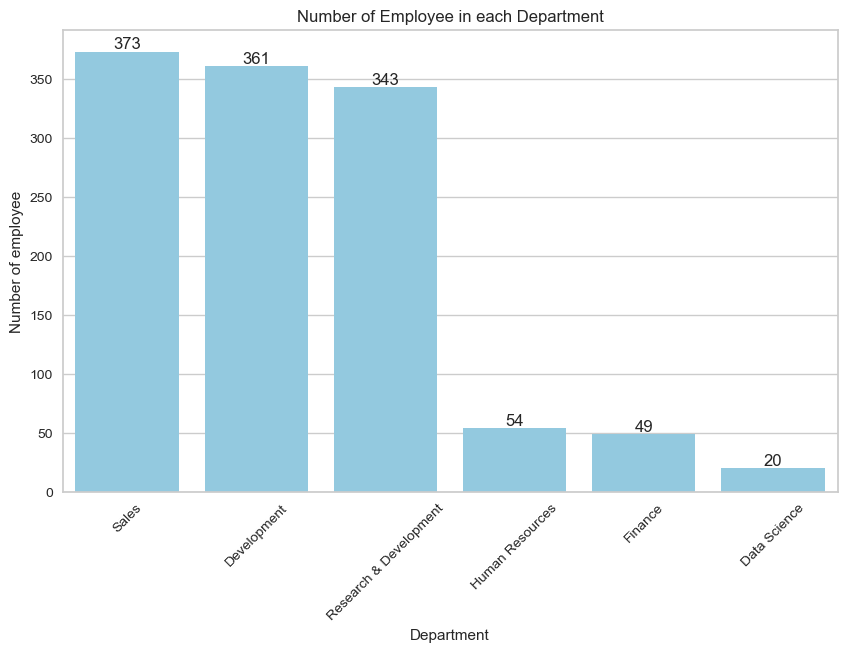

In [204]:
# visualizing the data 
department_count = df.EmpDepartment.value_counts()

plt.figure(figsize = (10,6))
ax = sns.barplot(x = department_count.index,y = department_count.values,color = 'skyblue')
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel('Department')
    plt.ylabel('Number of employee')
    plt.title('Number of Employee in each Department')
    plt.xticks(rotation = 45)
    plt.show()

# insights:
    
##Sales Department:

The largest department with 31.08% employees.
This indicates a significant focus on sales, possibly reflecting the companys business strategy and revenue generation priorities.

##Development Department:

The second largest department with 30% employees.
Highlights the importance of developing new products or services and maintaining existing ones.

##Research & Development (R&D) Department:

The third largest department with 28% employees.
Emphasizes the companys commitment to innovation and improving existing products or services.

##Human Resources (HR) Department:

Has 4.5% employees.
HR is crucial for managing employee relations, recruitment, and ensuring the company has the talent it needs to succeed.

##Finance Department:

Comprises 4.08% employees.
Indicates a lean finance team, suggesting streamlined financial operations or a focus on automation and efficiency in financial processes.

##Data Science Department:

The smallest department with 1.66% employees.
Despite being the smallest, this department is likely focused on leveraging data for insights, strategic decision-making, and optimizing various business processes.

In [205]:
# checking the number of unique values in PerformanceRating
df.PerformanceRating.unique()

array([3, 4, 2], dtype=int64)

In [206]:
#checking the number of values in the Performacerating
df.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

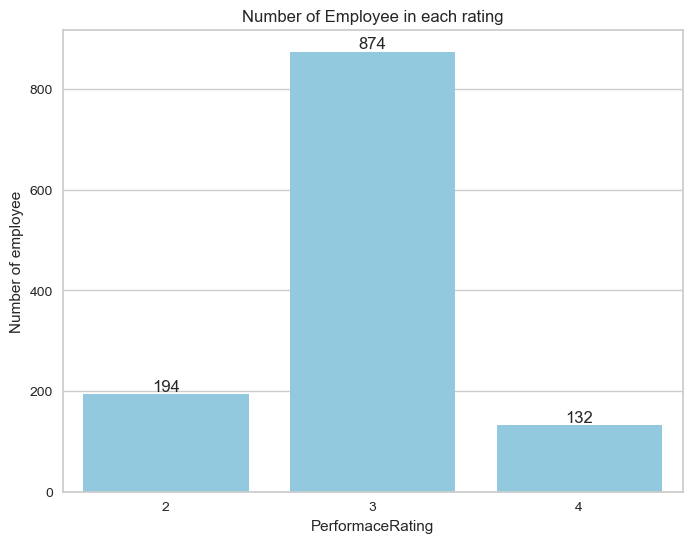

In [207]:
# visualizing the data 
perfromace_count = df.PerformanceRating.value_counts()

plt.figure(figsize = (8,6))
ax = sns.barplot(x = perfromace_count.index,y = perfromace_count.values,color = 'skyblue')
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel('PerformaceRating')
    plt.ylabel('Number of employee')
    plt.title('Number of Employee in each rating')
    plt.show()

# insights:
 
Most Common Performance Rating:

The majority of employees have a performance rating of 3, with 72.8% employees falling into this category.
This suggests that the typical performance level is average, as most employees are meeting the expected standards.

Below Average Performance Rating:

16.16% employees have a performance rating of 2.
This indicates that a significant minority of employees are performing below expectations, which might require attention for improvement through training, mentoring, or other performance enhancement programs.

High Performance Rating:

11% employees have a performance rating of 4.
This shows that a smaller segment of the workforce is excelling and exceeding expectations. These employees could be considered for leadership roles, promotions, or other forms of recognition and reward.

In [208]:
# using pivot table to check the perfomace of all the continous columns with target
pd.pivot_table(df,index=df.EmpDepartment,columns=df.PerformanceRating,aggfunc='mean')

Age                       DistanceFromHome  \
PerformanceRating               2          3          4                2   
EmpDepartment                                                              
Data Science            40.000000  38.294118  34.500000         2.000000   
Development             35.153846  36.927632  35.204545        10.615385   
Finance                 39.466667  34.900000  36.000000        14.733333   
Human Resources         39.100000  38.368421  37.666667         4.500000   
Research & Development  38.014706  37.282051  37.682927         9.691176   
Sales                   37.574713  36.031873  36.714286         9.689655   

                                             EmpEducationLevel            \
PerformanceRating               3          4                 2         3   
EmpDepartment                                                              
Data Science             9.764706  12.500000          2.000000  2.823529   
Development              8.953947   7.113636          2.076923  2.878289   
Finance                 10.800000   9.250000          3.200000  3.066667   
Human Resources          9.947368   7.500000          3.000000  3.052632   
Research & Development   9.064103   9.414634          2.720588  2.923077   
Sales                    9.063745   8.542857          2.954023  2.884462   

                                 EmpEnvironmentSatisfaction            \
PerformanceRating              4                          2         3   
EmpDepartment                                                           
Data Science            2.500000                   1.000000  3.058824   
Development             2.909091                   1.461538  2.726974   
Finance                 2.500000                   1.600000  3.333333   
Human Resources         2.666667                   1.600000  2.842105   
Research & Development  2.853659                   1.602941  3.038462   
Sales                   3.057143                   1.586207  2.968127   

                                 EmpHourlyRate                        \
PerformanceRating              4             2          3          4   
EmpDepartment                                                          
Data Science            3.000000     49.000000  64.117647  53.000000   
Development             2.954545     64.846154  65.848684  65.977273   
Finance                 3.750000     63.466667  67.666667  71.500000   
Human Resources         3.000000     81.100000  61.736842  65.166667   
Research & Development  3.219512     69.867647  66.397436  65.878049   
Sales                   3.028571     66.988506  65.027888  63.257143   

                       EmpJobInvolvement                     EmpJobLevel  \
PerformanceRating                      2         3         4           2   
EmpDepartment                                                              
Data Science                    3.000000  2.941176  2.500000    5.000000   
Development                     3.000000  2.792763  2.704545    2.615385   
Finance                         3.000000  2.800000  3.000000    2.266667   
Human Resources                 2.800000  2.789474  2.666667    1.700000   
Research & Development          2.779412  2.670940  2.609756    2.029412   
Sales                           2.563218  2.725100  2.685714    2.517241   

                                           EmpJobSatisfaction            \
PerformanceRating              3         4                  2         3   
EmpDepartment                                                             
Data Science            2.000000  1.500000           3.000000  2.529412   
Development             1.947368  1.681818           2.846154  2.736842   
Finance                 1.733333  2.250000           2.800000  2.600000   
Human Resources         2.131579  2.166667           2.600000  2.526316   
Research & Development  1.991453  1.975610           2.897059  2.700855   
Sales                   2.163347  2.457143           2.632184  2.784

In [209]:
# using group by to calulate the department wise performance
df.groupby('EmpDepartment')['PerformanceRating'].agg(['mean','median','std'])

mean  median       std
EmpDepartment                                     
Data Science            3.050000     3.0  0.394034
Development             3.085873     3.0  0.388508
Finance                 2.775510     3.0  0.586846
Human Resources         2.925926     3.0  0.544331
Research & Development  2.921283     3.0  0.559016
Sales                   2.860590     3.0  0.555400

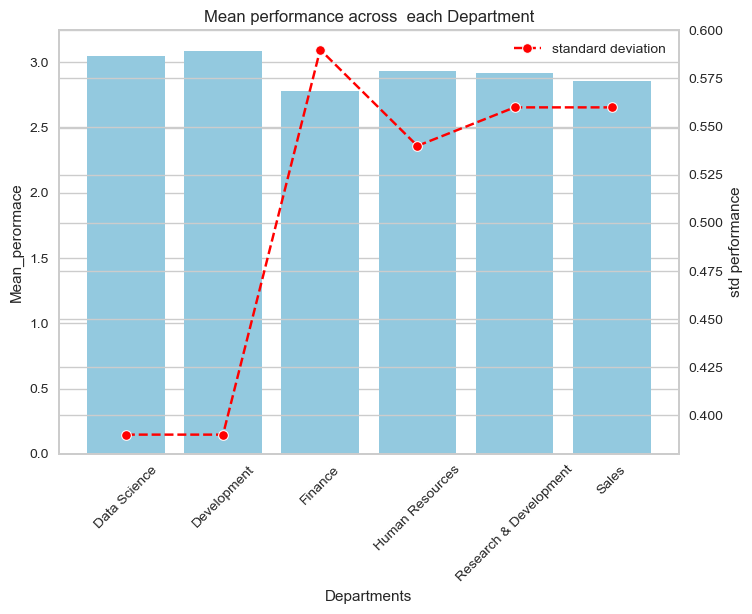

In [210]:
# visualizing the mean and std
departments = ['Data Science', 'Development', 'Finance', 'Human Resources', 'Research & Development', 'Sales']
mean_performance = [3.05, 3.09, 2.78, 2.93, 2.92, 2.86]
std_performance = [0.39, 0.39, 0.59, 0.54, 0.56, 0.56]

# using bar plot to visualize the mean performace and line plot to visualize std performace
ax1 = plt.subplot()
sns.barplot(x =departments,y = mean_performance,color = 'skyblue',ax = ax1)
# creating a secondary ylabel
ax2 = ax1.twinx()
sns.lineplot(x= departments, y = std_performance,color = 'red',ax = ax2,marker='o',linestyle='--',label='standard deviation')
ax1.set_ylabel('Mean_perormace')
ax2.set_ylabel('std performance')
ax1.set_xlabel('Departments')
plt.title('Mean performance across  each Department')
ax1.set_xticklabels(departments,rotation=45)

plt.show()



# Insights:
Average Performance (Mean):

The Development department has the highest average performance rating (3.09).
The Finance department has the lowest average performance rating (2.78).
Median Performance:

All departments have a median performance rating of 3.0, indicating that the middle value of performance ratings is consistent across departments.
Performance Variation (Standard Deviation):

The Finance department has the highest standard deviation (0.59), suggesting the greatest variability in performance ratings.
The Development department has the lowest standard deviation (0.39), indicating the most consistent performance ratings.

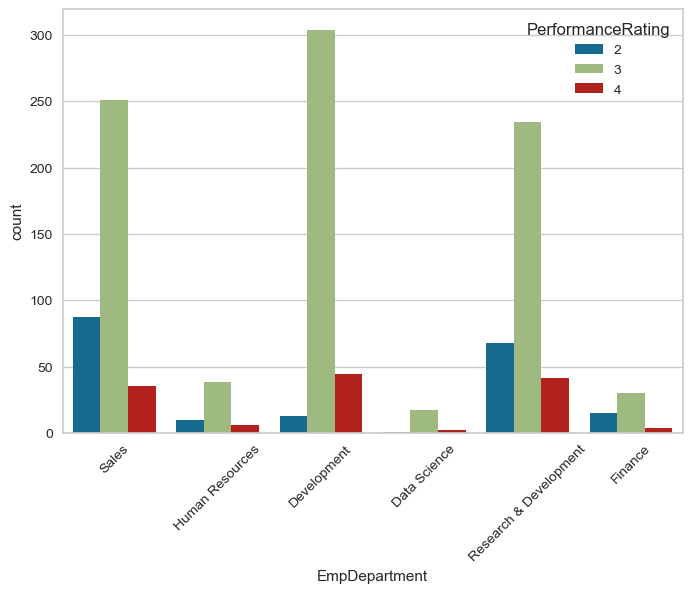

In [211]:
# checking the overall performace throught the Empdepartment
sns.countplot(x = df.EmpDepartment,hue = df.PerformanceRating)
plt.xticks(rotation=45)
plt.show()

## insights:
    
majority of the people from all the department are given a rating of 3 which is a moderate one there are relatively
less number of people that company need to focuss on giving more traing and evaluate there performance on daily needs 

# 2. Top 3 Important Factors effecting employee performance

# 

In [212]:
df.corr().abs()['PerformanceRating'].sort_values(ascending=False).index[1:4]

Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'YearsSinceLastPromotion'],
      dtype='object')

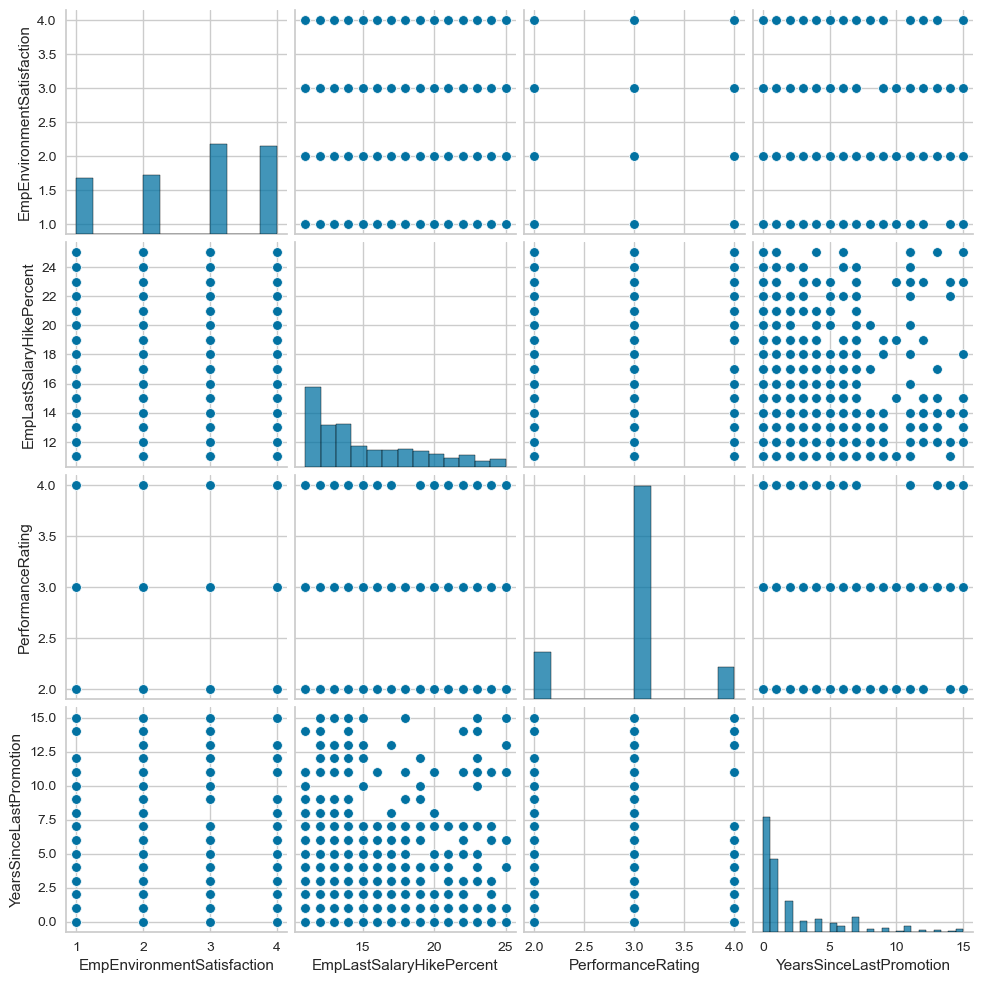

In [213]:
# top three feature effecting employee performance
top_features = df.corr().abs()['PerformanceRating'].sort_values(ascending=False).index[1:4]
sns.pairplot(df[top_features.union(['PerformanceRating'])])
plt.show()

# EDA

## univariate analysis

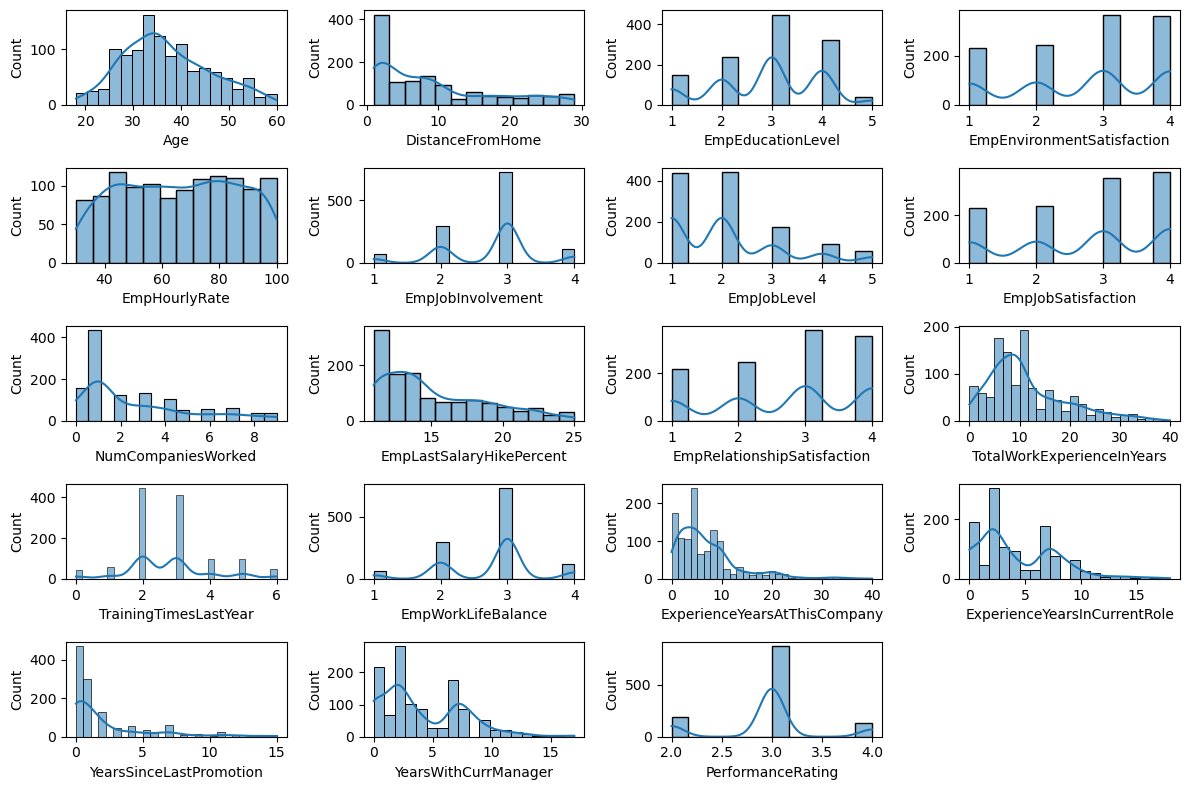

In [62]:
plt.figure(figsize=(12,8))
plotnumber = 1
for i in df.select_dtypes('int'):
    plt.subplot(5,4,plotnumber)
    sns.histplot(df[i],kde = True)
    plotnumber+=1
plt.tight_layout()

# observation: 
    
Age : The age distribution apperas to be right-skewed with most employee between 30 to 40
    
DistanceFromHome : the distribution is right- skewed indicating the most employee live relatively close to their work place 

EmpEducationLevel : the distribution seems to multimodal indicating the employee have various educational level

EmpEnvironmentSatisfaction : The distribution seems to be somewhat uniform suggesting that employee satisfaction varies
    across the differnt level 
    
EmpHourlyRate : The distribution is fairly uniform indicating the hourly rate spread evenlly 

EmpJobInvolvement : indicating various degrees of job involment of employee

EmpJobLevel : the distribution seems somewhat right-skewed ,suggesting more employee at lower job level

EmpJobSatisfaction : The distribution is relatively uniform ,indicating various job satisfaction level
    
NumCompaniesWorked : The distribution is right skewed ,indicating most employee worked for fewer companies

EmpLastSalaryHikePercent : The distribution is somewhat normal ,indicating an avg hike of 15% to 20%

EmpRelationshipSatisfaction : the distribution looks moderately uniform 

TotalWorkExperienceInYears : The distribution is right skewed with most employee having less tha 10 years experience
    
TrainingTimesLastYear : The distribution is multimodal showing employee having varies training frequencies

EmpWorkLifeBalance : The distribution is multimodal indicating varies work-life balance level
    
ExperienceYearsAtThisCompany : The distribution is right-skewed ,most employee seems to be for a shorter duration
    

ExperienceYearsInCurrentRole : Right-skewed suggesting most employee have spent fewer years

YearsSinceLastPromotion : Right-skewed suggesting most employee have not been promoted

YearsWithCurrManager : Right-skewed indicating most employee with their current manager for a fewer duration
    
PerformanceRating : multimodal distribution 

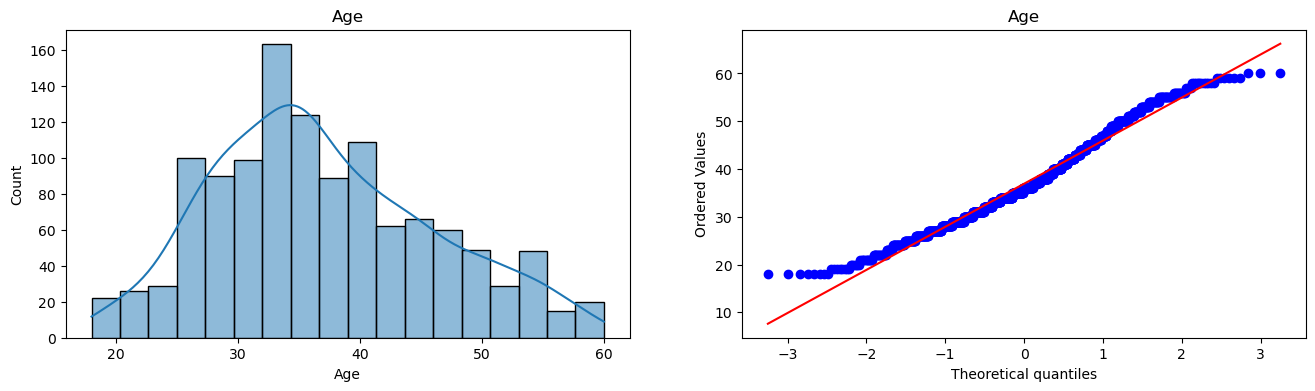

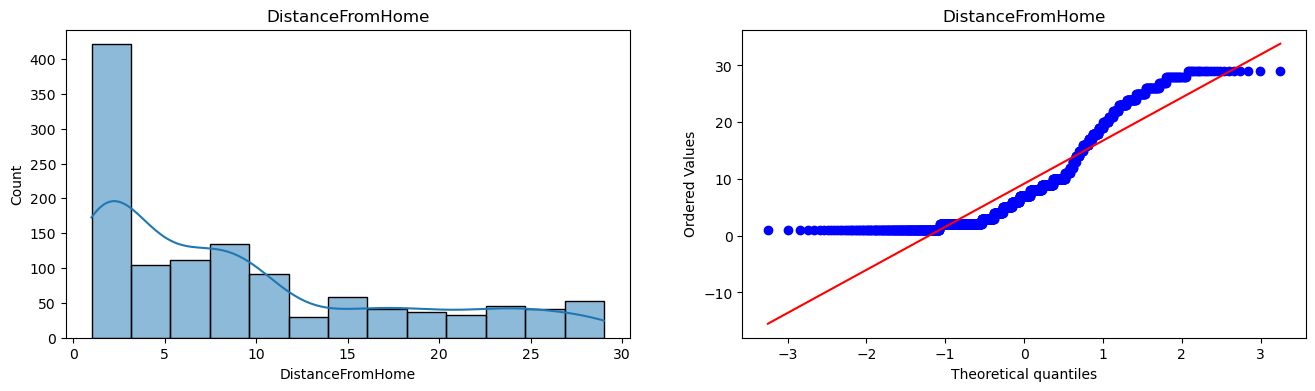

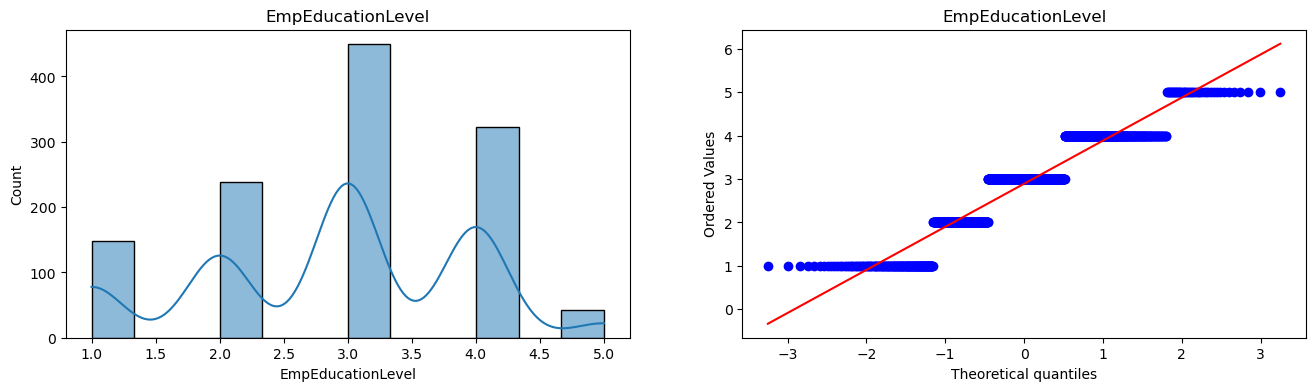

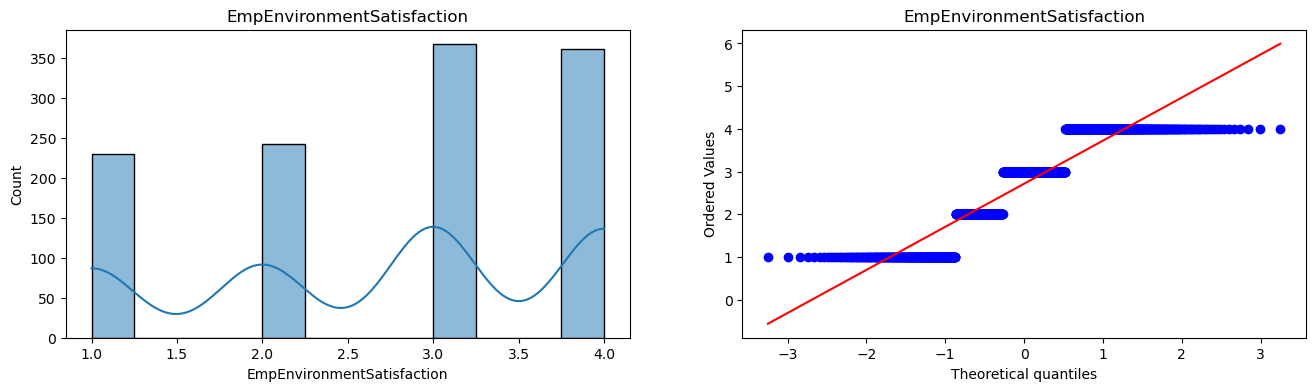

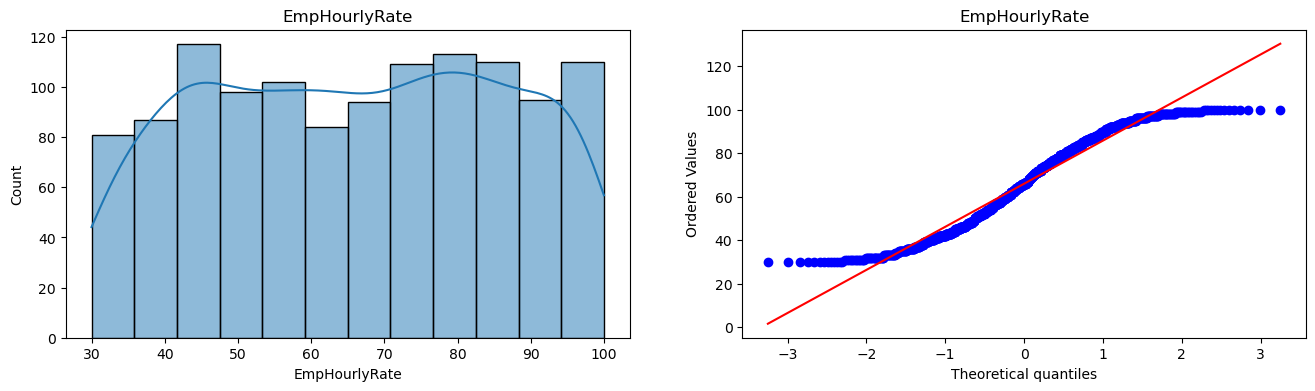

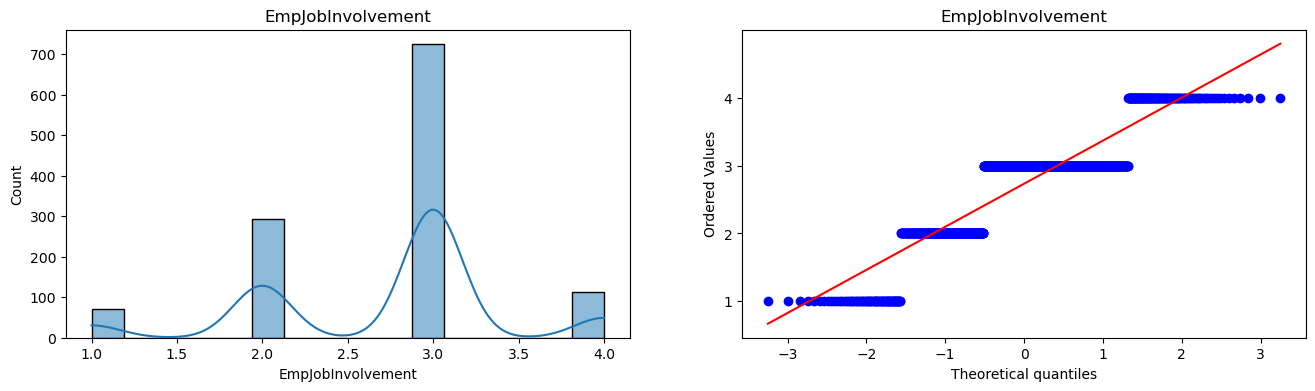

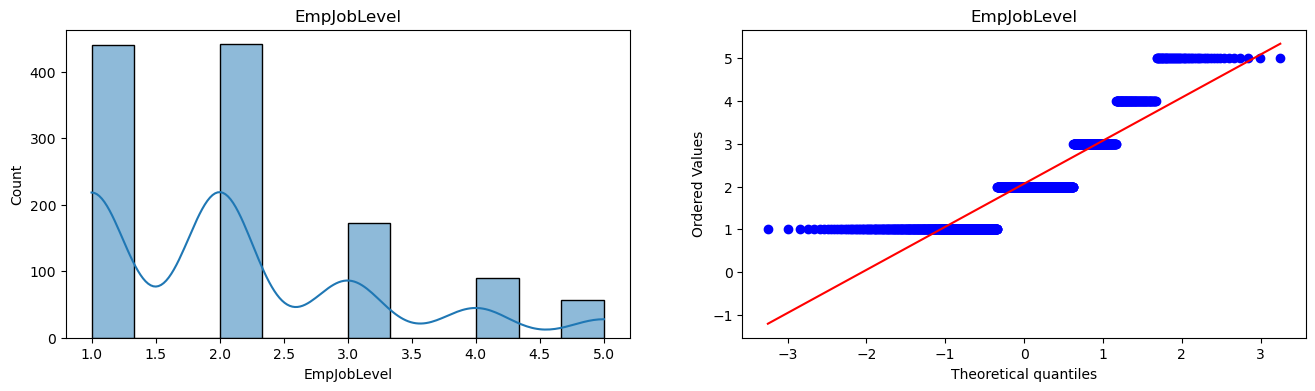

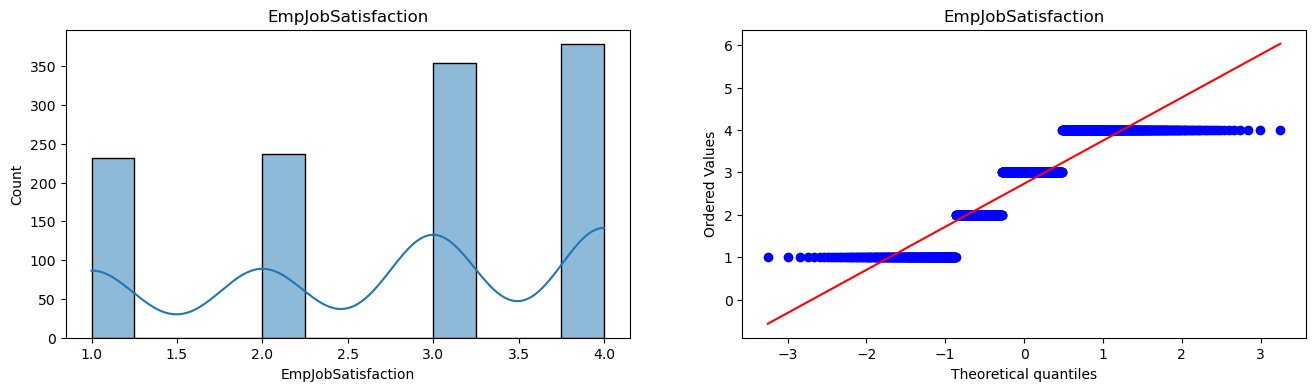

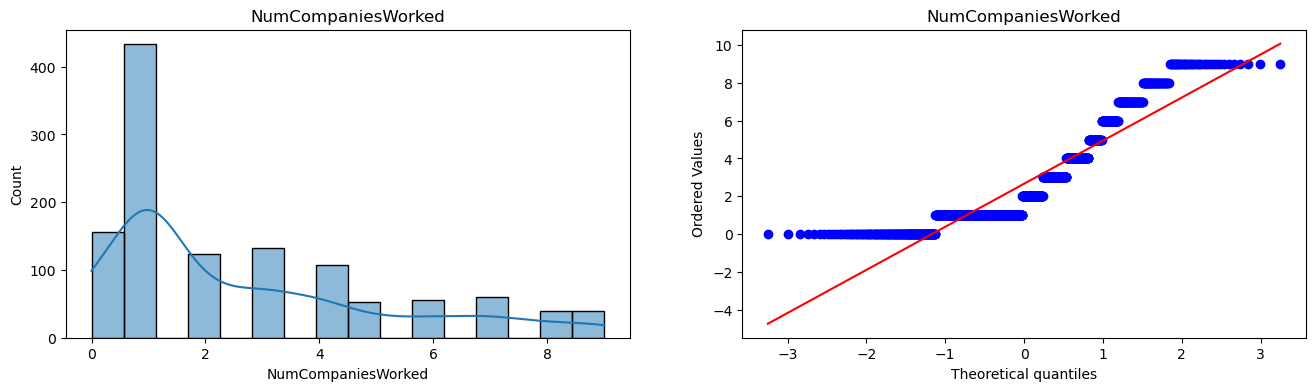

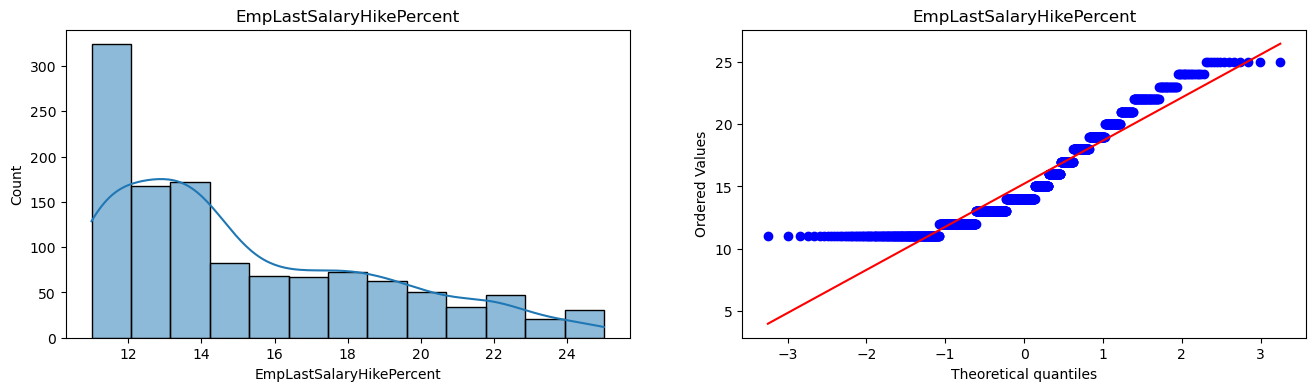

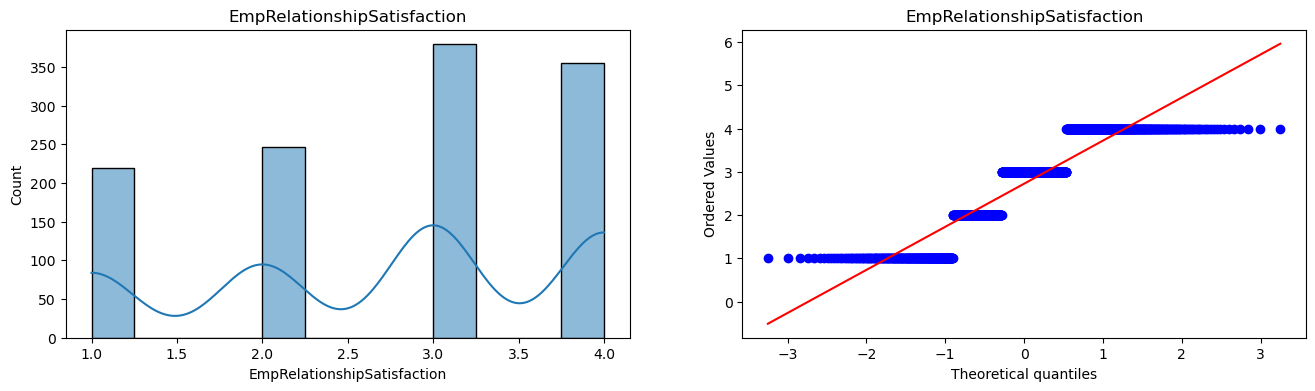

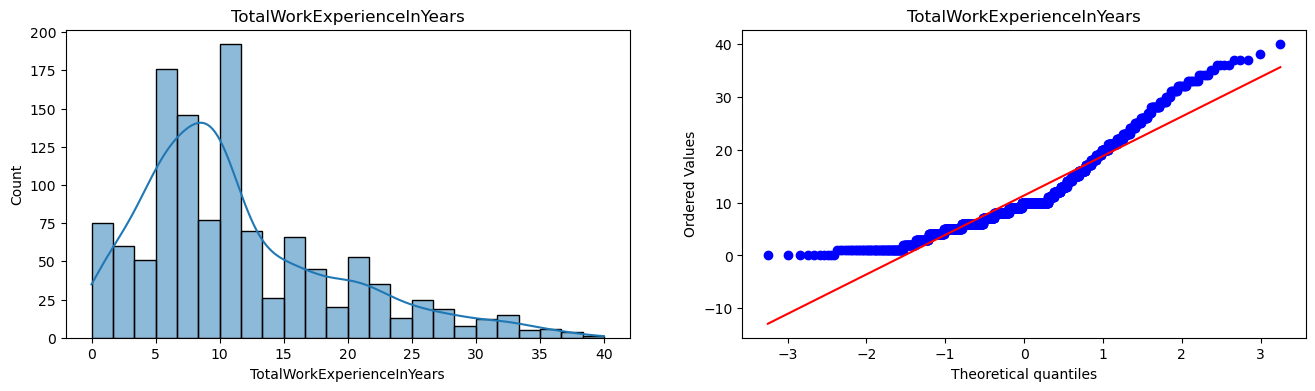

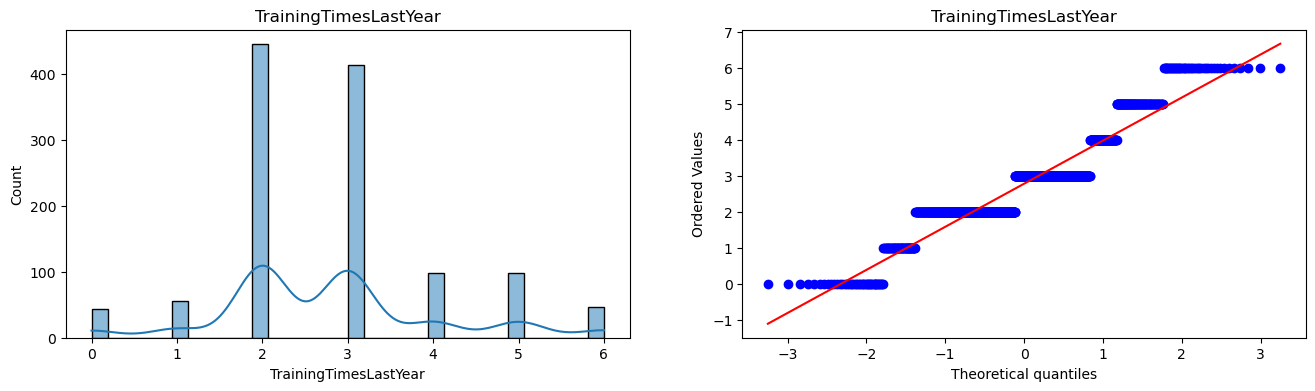

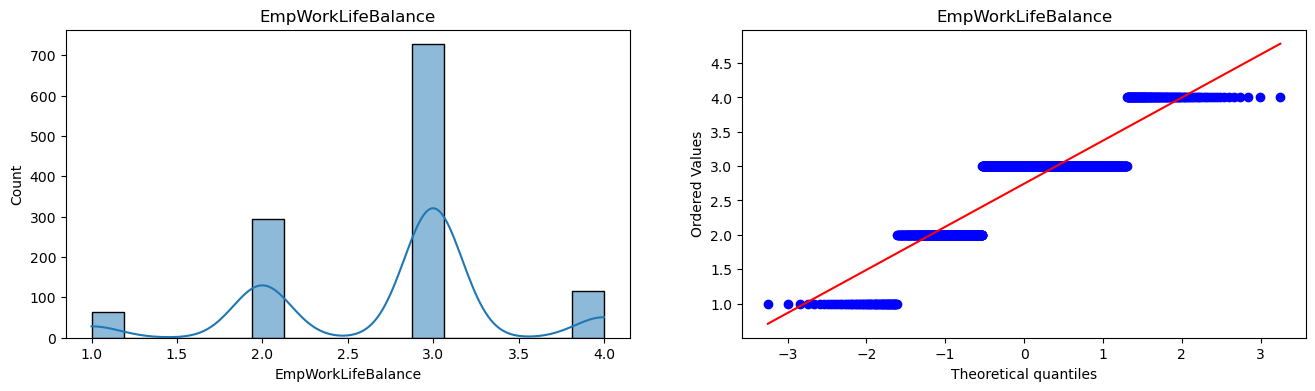

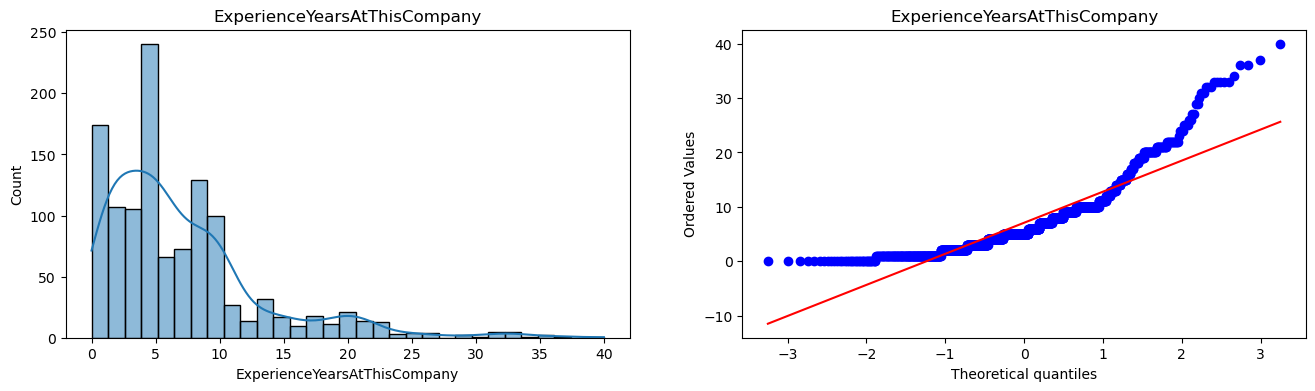

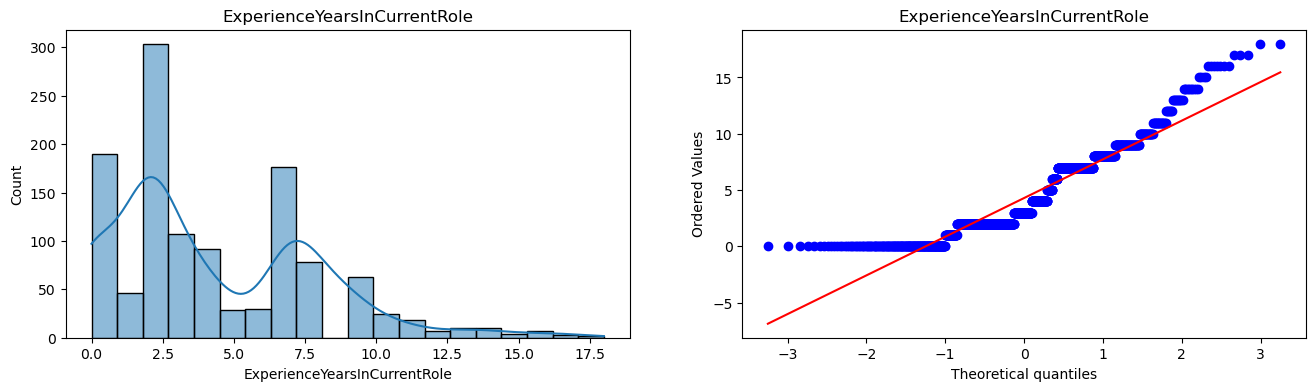

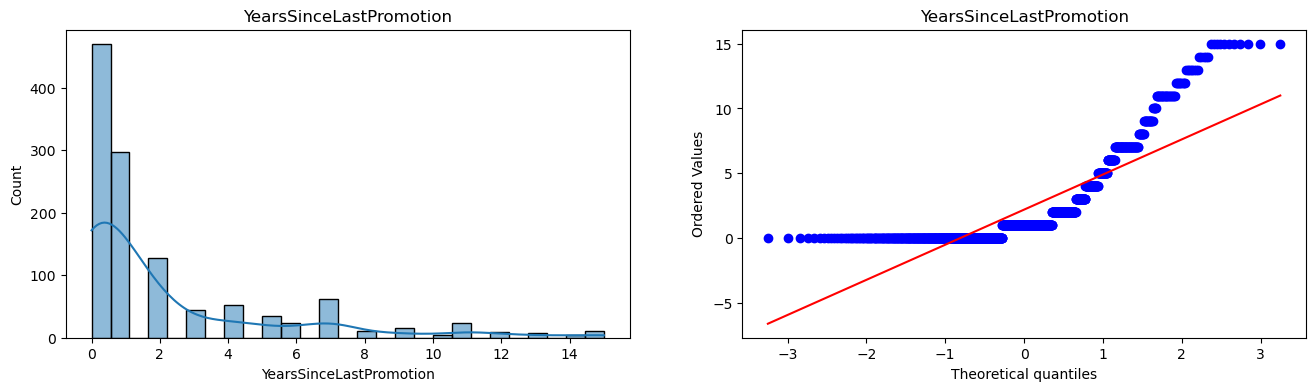

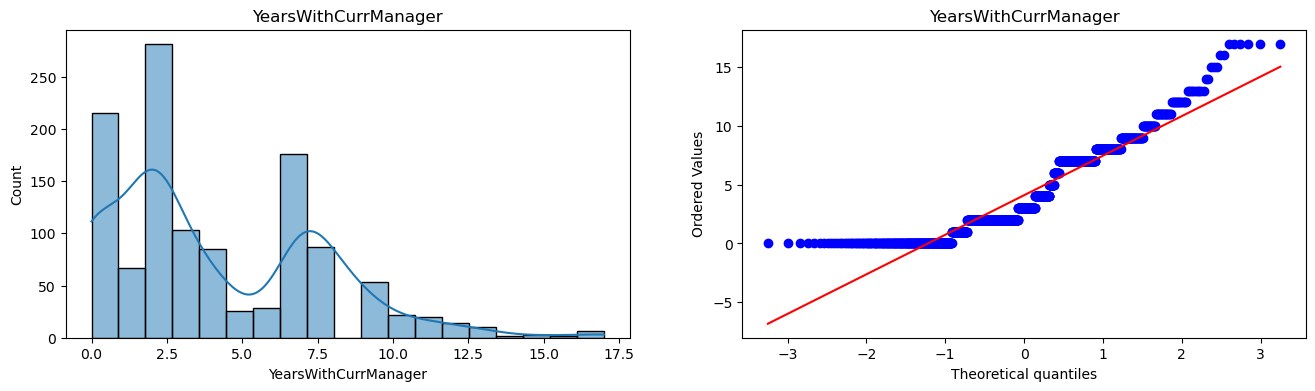

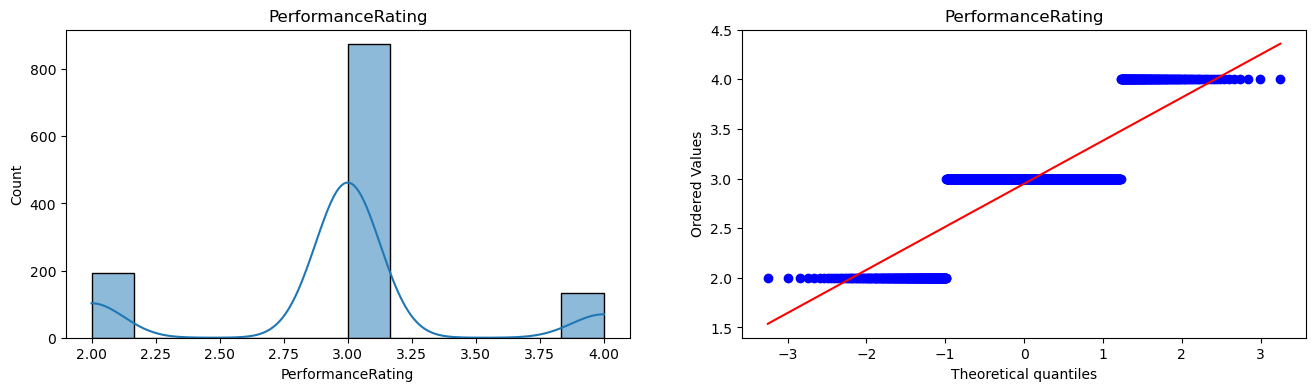

In [63]:
from scipy import stats
# comparing the distribution visually for normality with the q-q plot
for i in df.select_dtypes('int'):
    plt.figure(figsize =(16,4))
    plt.subplot(121)
    sns.histplot(df[i],kde = True)
    plt.title(i)
    
    plt.subplot(122)
    stats.probplot(df[i],dist= 'norm',plot = plt)
    plt.title(i)
    plt.show()

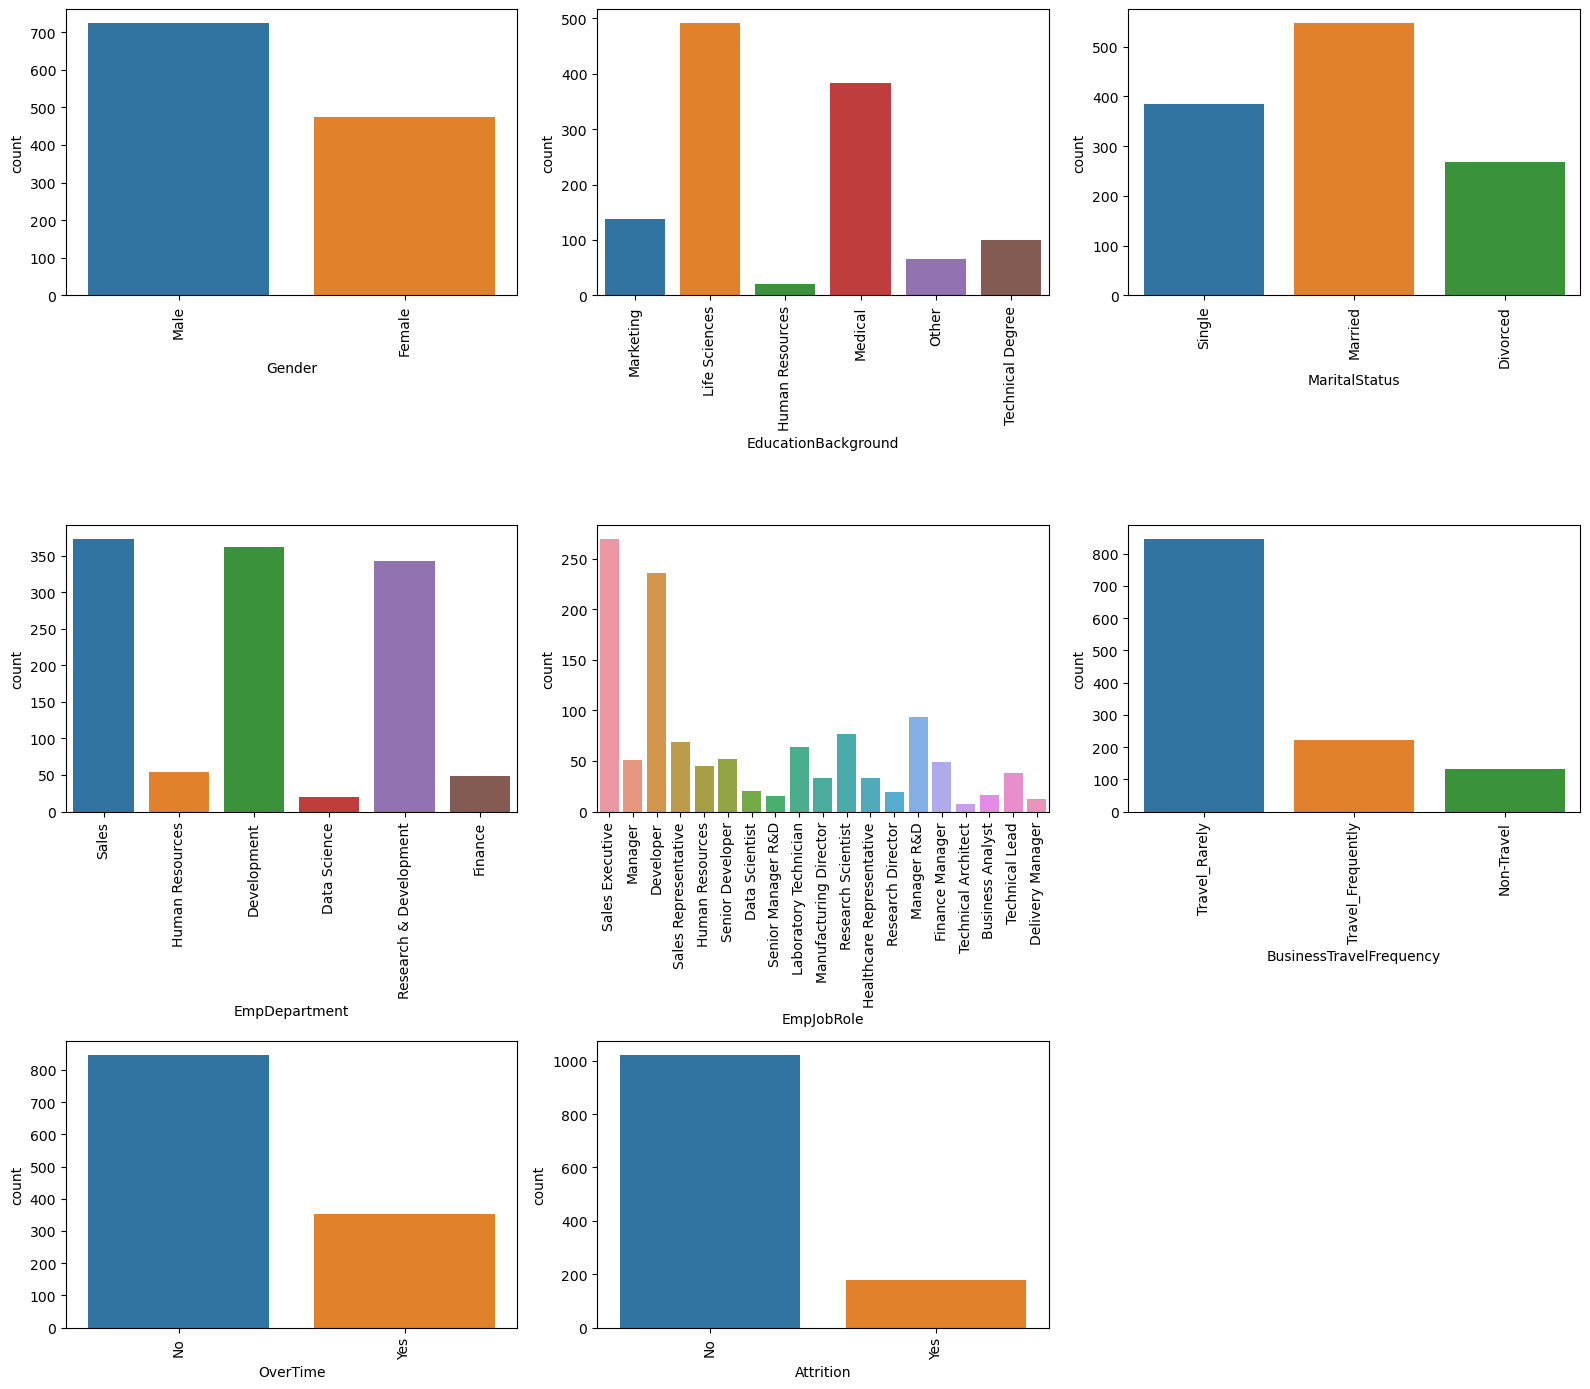

In [64]:
# visualizing the categorical columns
plt.figure(figsize=(16,14))
plotnumber = 1

# looping throught the categorical columns
for i in df.select_dtypes('object'):
    plt.subplot(3,3,plotnumber)
    sns.countplot(x = df[i])
    plt.xticks(rotation = 90)
    plotnumber+=1
plt.tight_layout()

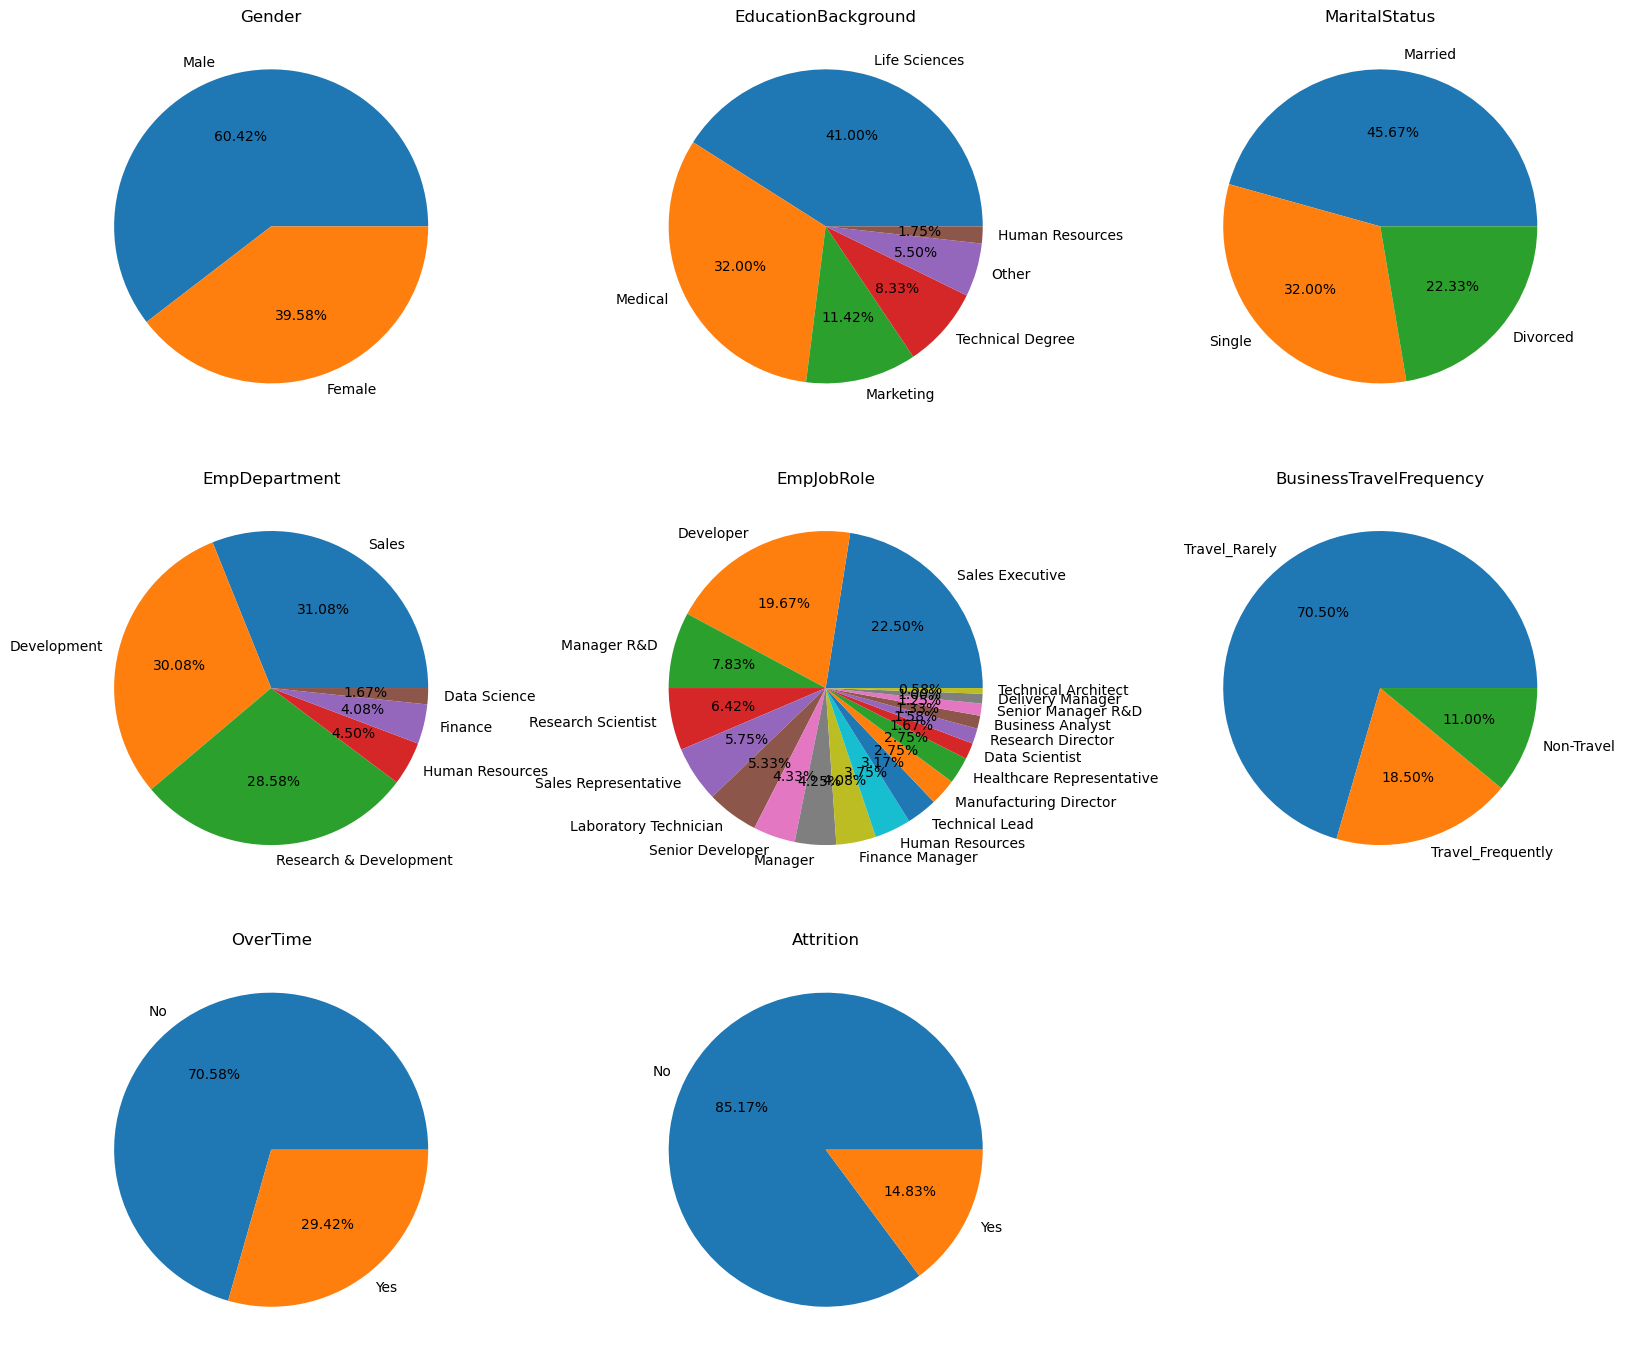

In [65]:
plt.figure(figsize=(16,14))
plotnumber = 1
# looping throught the categorical columns
for i in df.select_dtypes('object'):
    plt.subplot(3,3,plotnumber)
    value_count = df[i].value_counts()
    plt.pie(value_count,labels=value_count.index,autopct='%1.2f%%')
    plt.title(i)
    plotnumber+=1
plt.tight_layout()

# Bivariate analysis

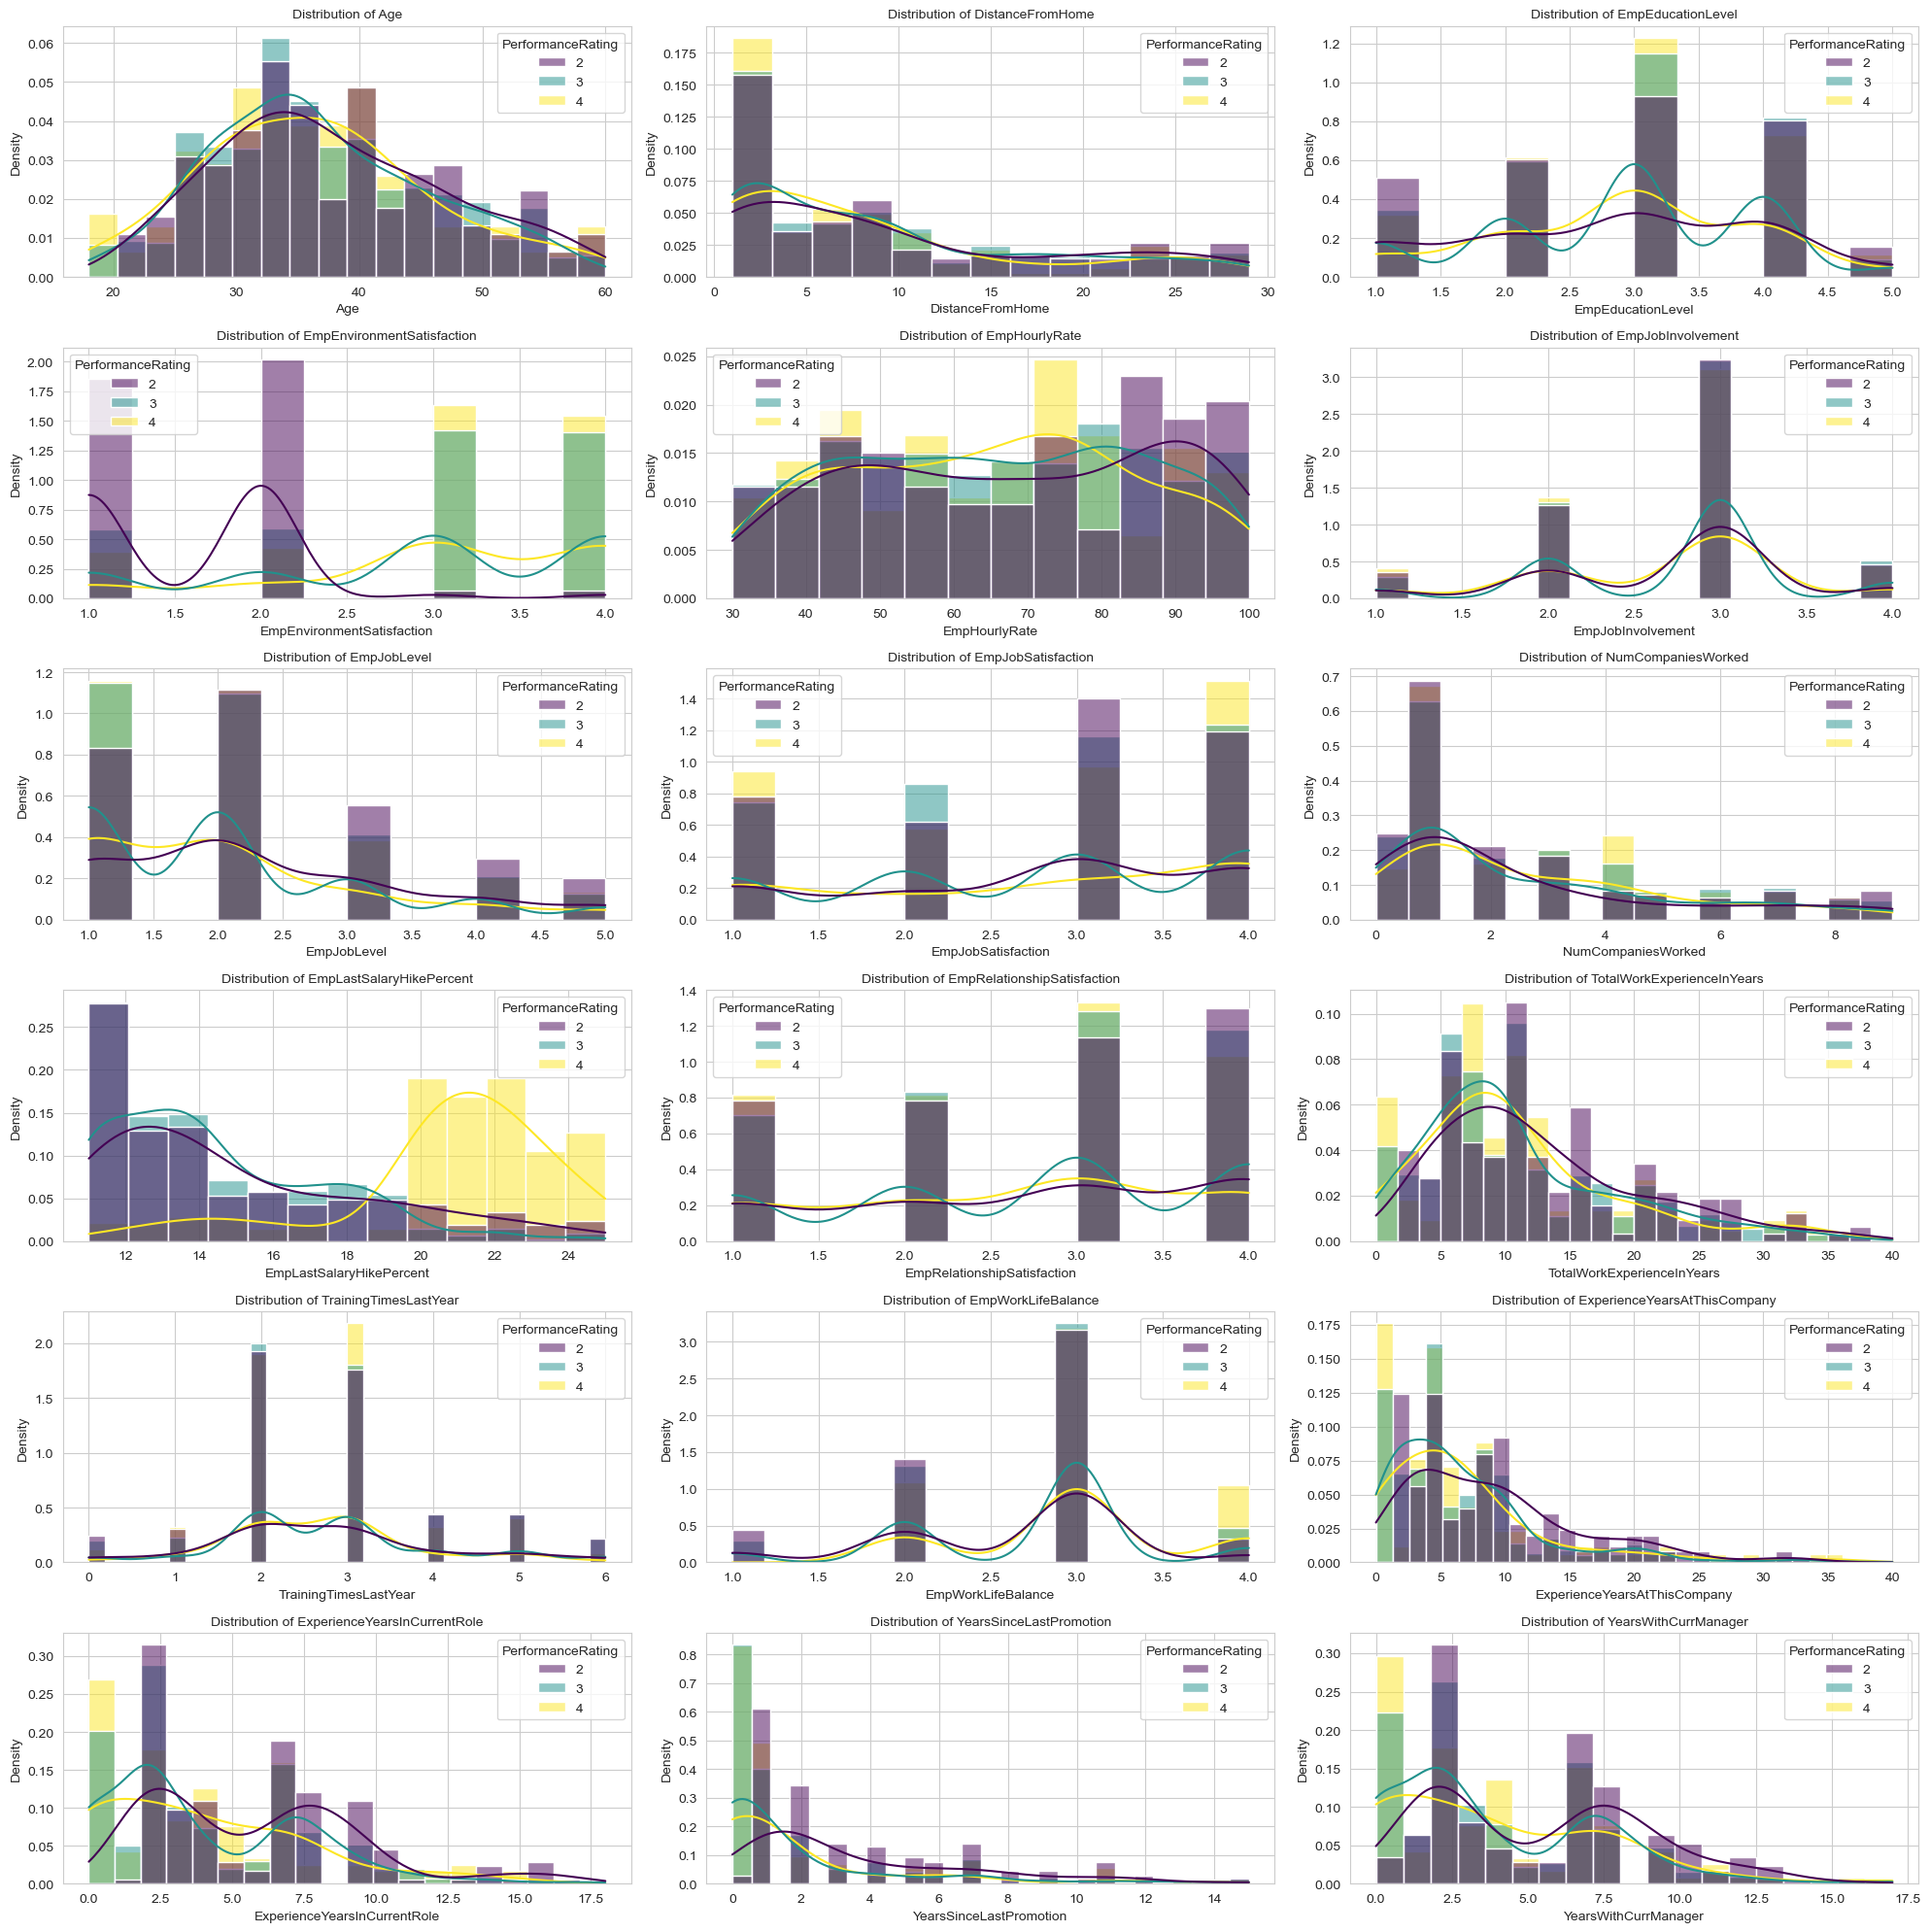

In [66]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(20,20))
plotnumber = 1

# Define a color palette for the hue
palette = sns.color_palette("viridis", as_cmap=True)

# Loop through the integer columns excluding 'PerformanceRating'
for i in df.select_dtypes('int').drop('PerformanceRating', axis=1):
    plt.subplot(6,3, plotnumber)
    sns.histplot(data=df, x=i, hue='PerformanceRating', palette=palette, kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {i}', fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()


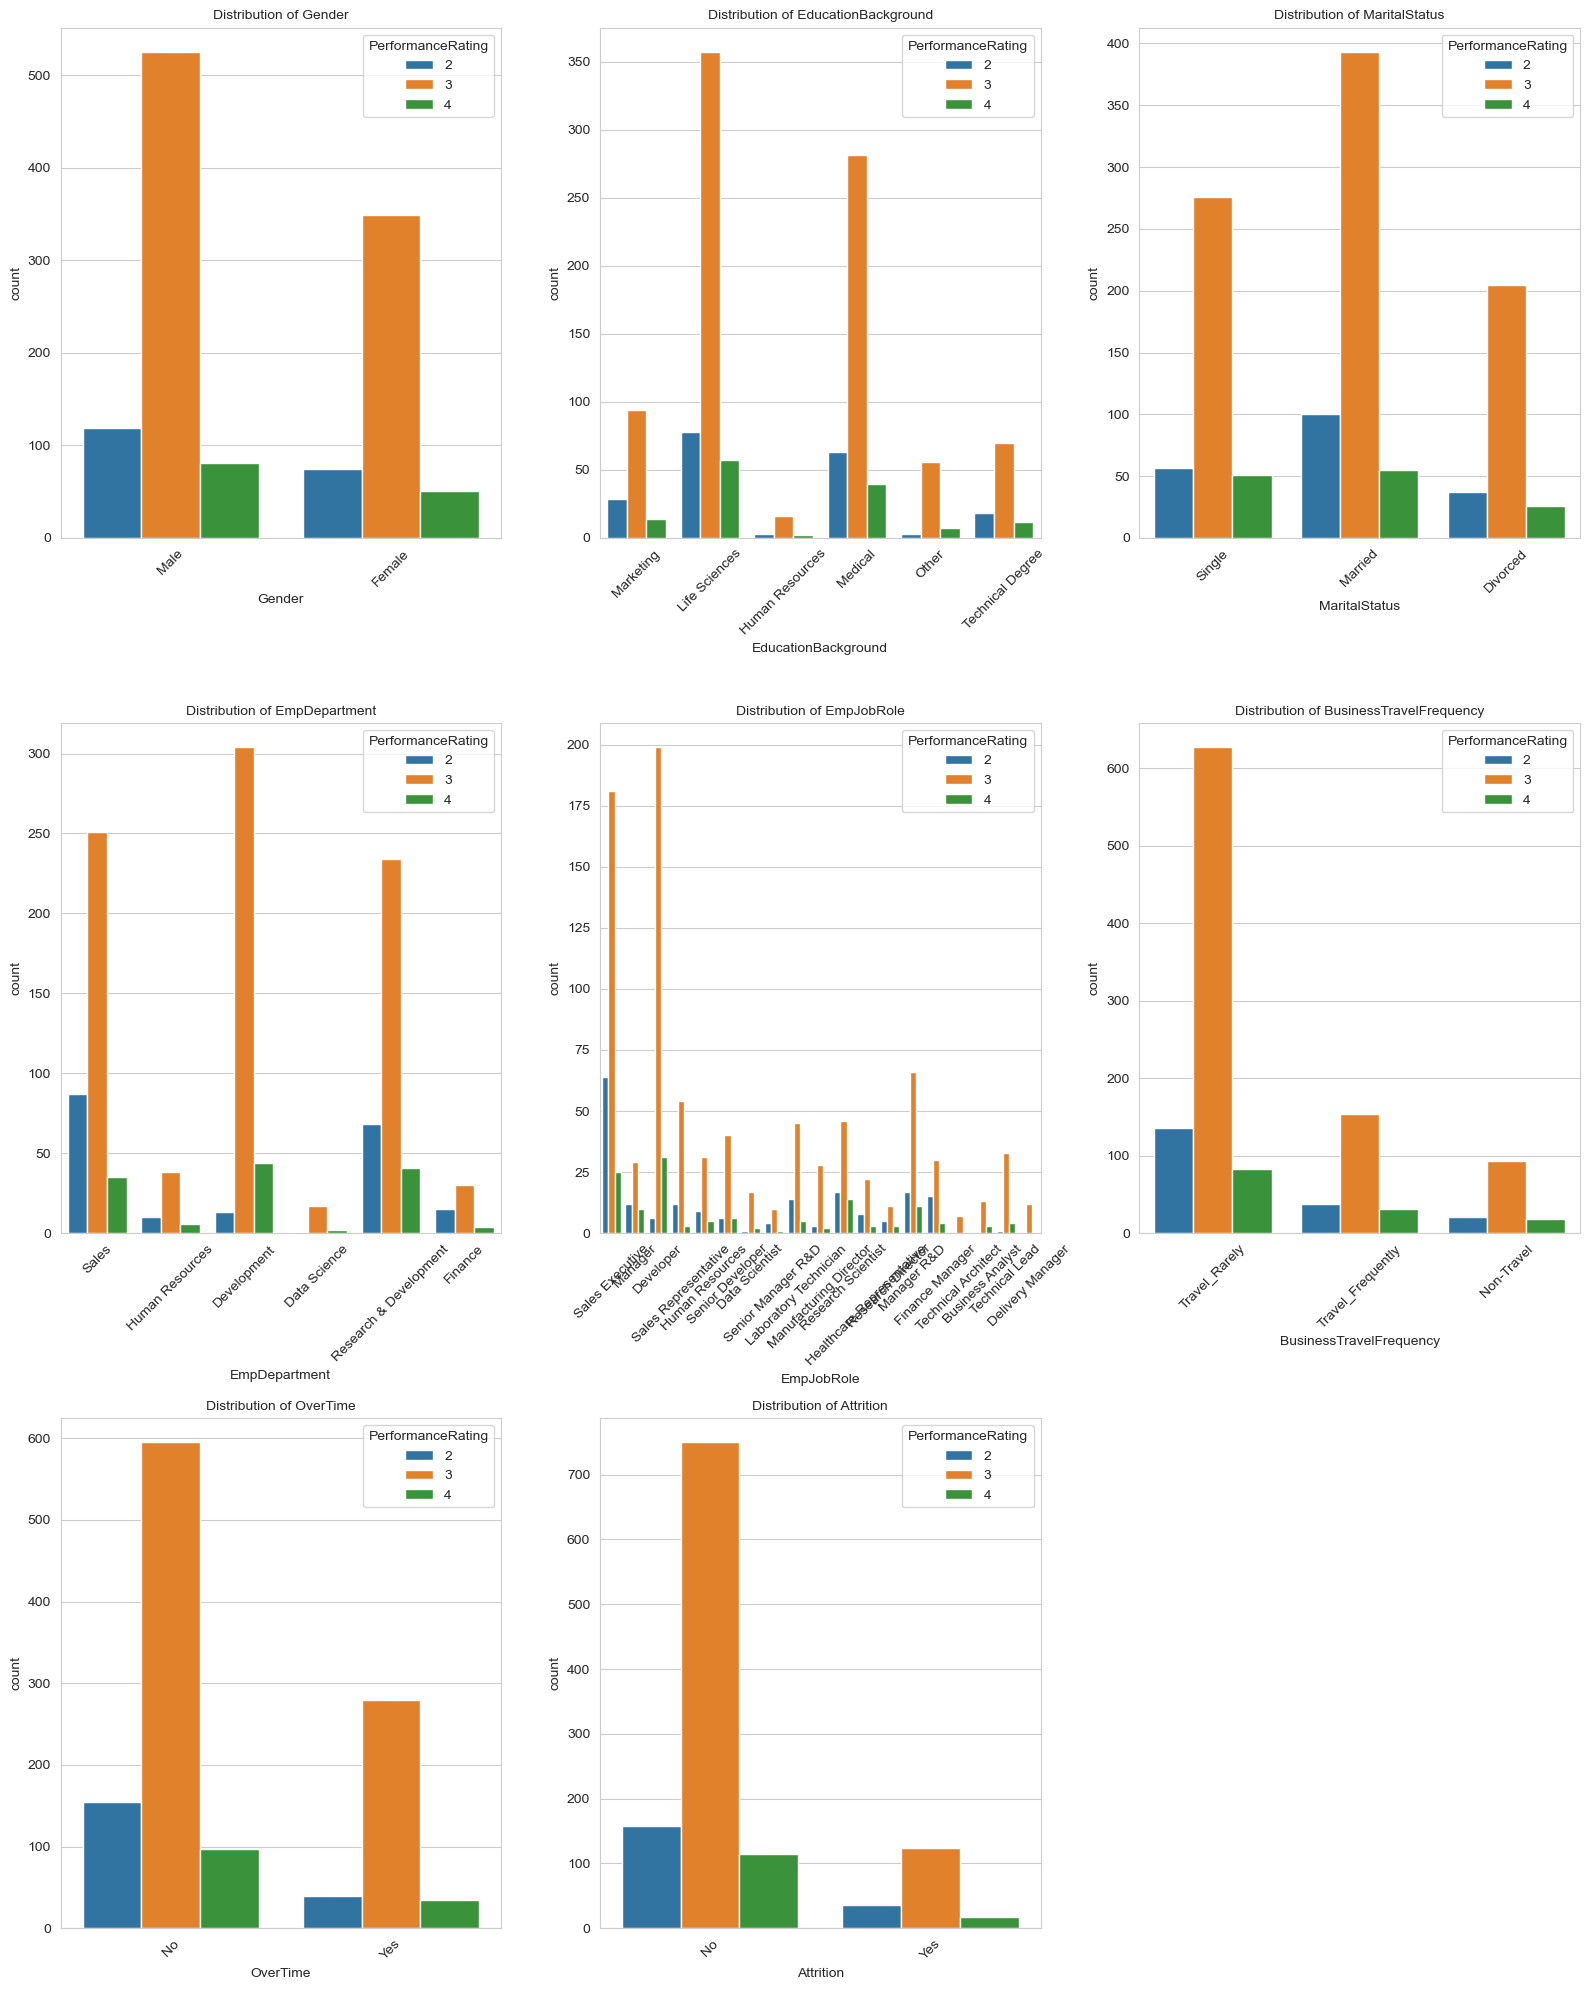

In [67]:
# visualizing the categorical columns with target column
plt.figure(figsize=(16,20)) 
plotnumber = 1


# Loop through the categorical columns
for i in df.select_dtypes('object'):
    plt.subplot(3, 3, plotnumber)
    sns.countplot(data=df, x=i, hue='PerformanceRating')
    plt.title(f'Distribution of {i}', fontsize=10)
    plt.xticks(rotation=45) 
    plotnumber += 1

plt.tight_layout()
plt.show()


In [214]:
# transforming the right skewed data 
right_skewed = ['YearsWithCurrManager','YearsSinceLastPromotion','ExperienceYearsInCurrentRole','ExperienceYearsAtThisCompany',
'TotalWorkExperienceInYears','NumCompaniesWorked','EmpJobLevel','DistanceFromHome','Age']

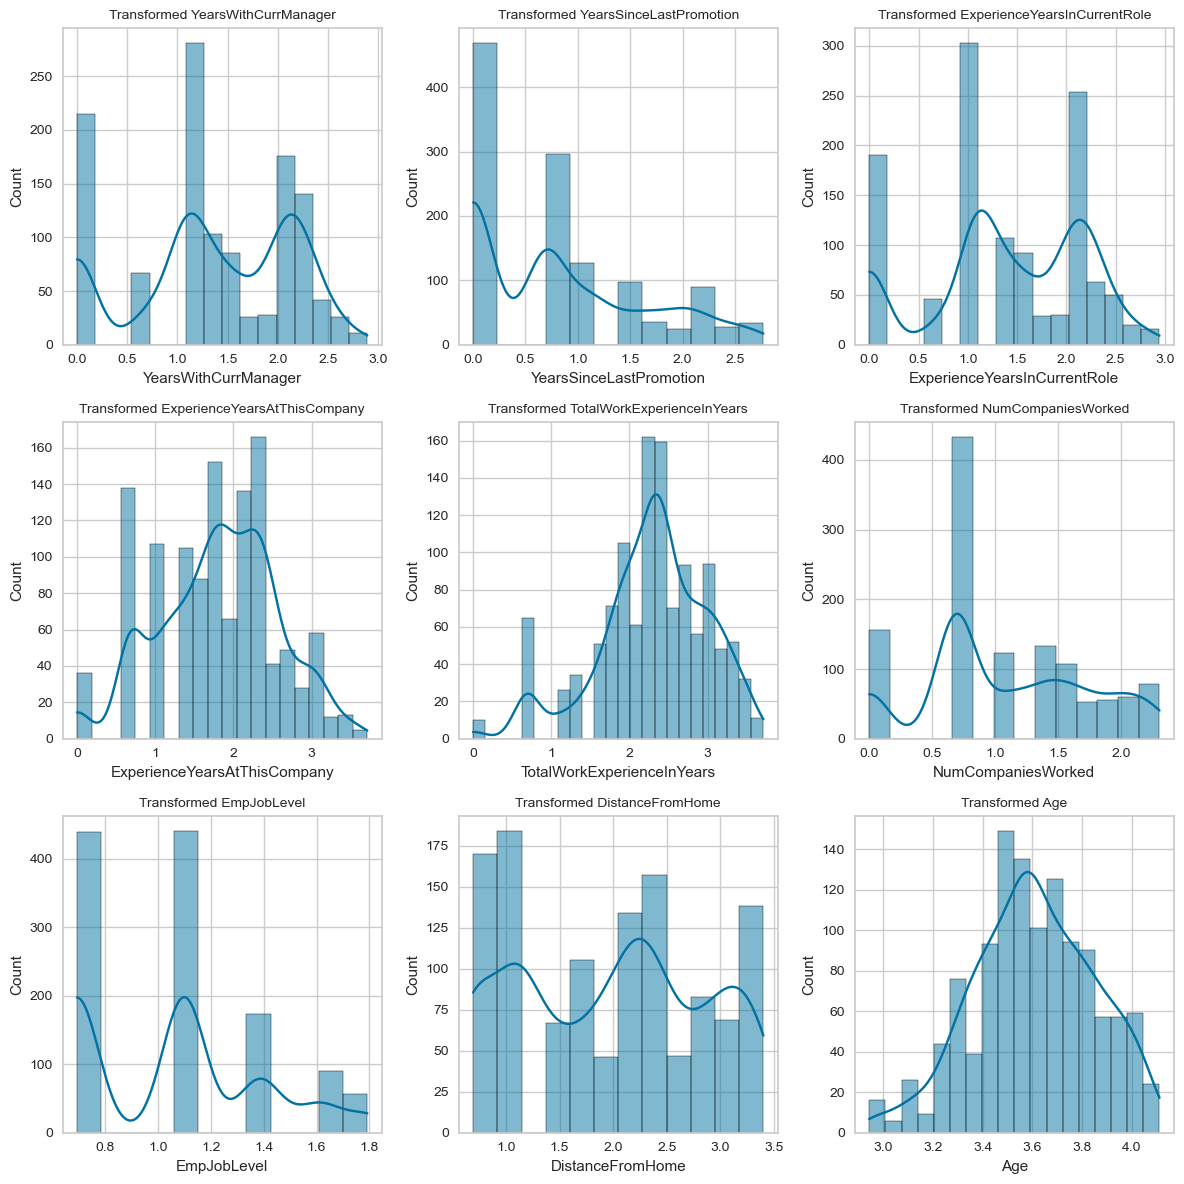

In [215]:

# Apply log transformation to right-skewed columns
for feature in right_skewed:
    df[feature] = np.log1p(df[feature])

# Set up the plot for visualizing the transformed data
plt.figure(figsize=(12, 12))
plotnumber = 1

# Loop through the transformed columns and plot the histograms
for feature in right_skewed:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Transformed {feature}', fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()


# Data preprocessing

In [31]:
# checking for the null values
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## observation:
    we see that there is no null values in the data set

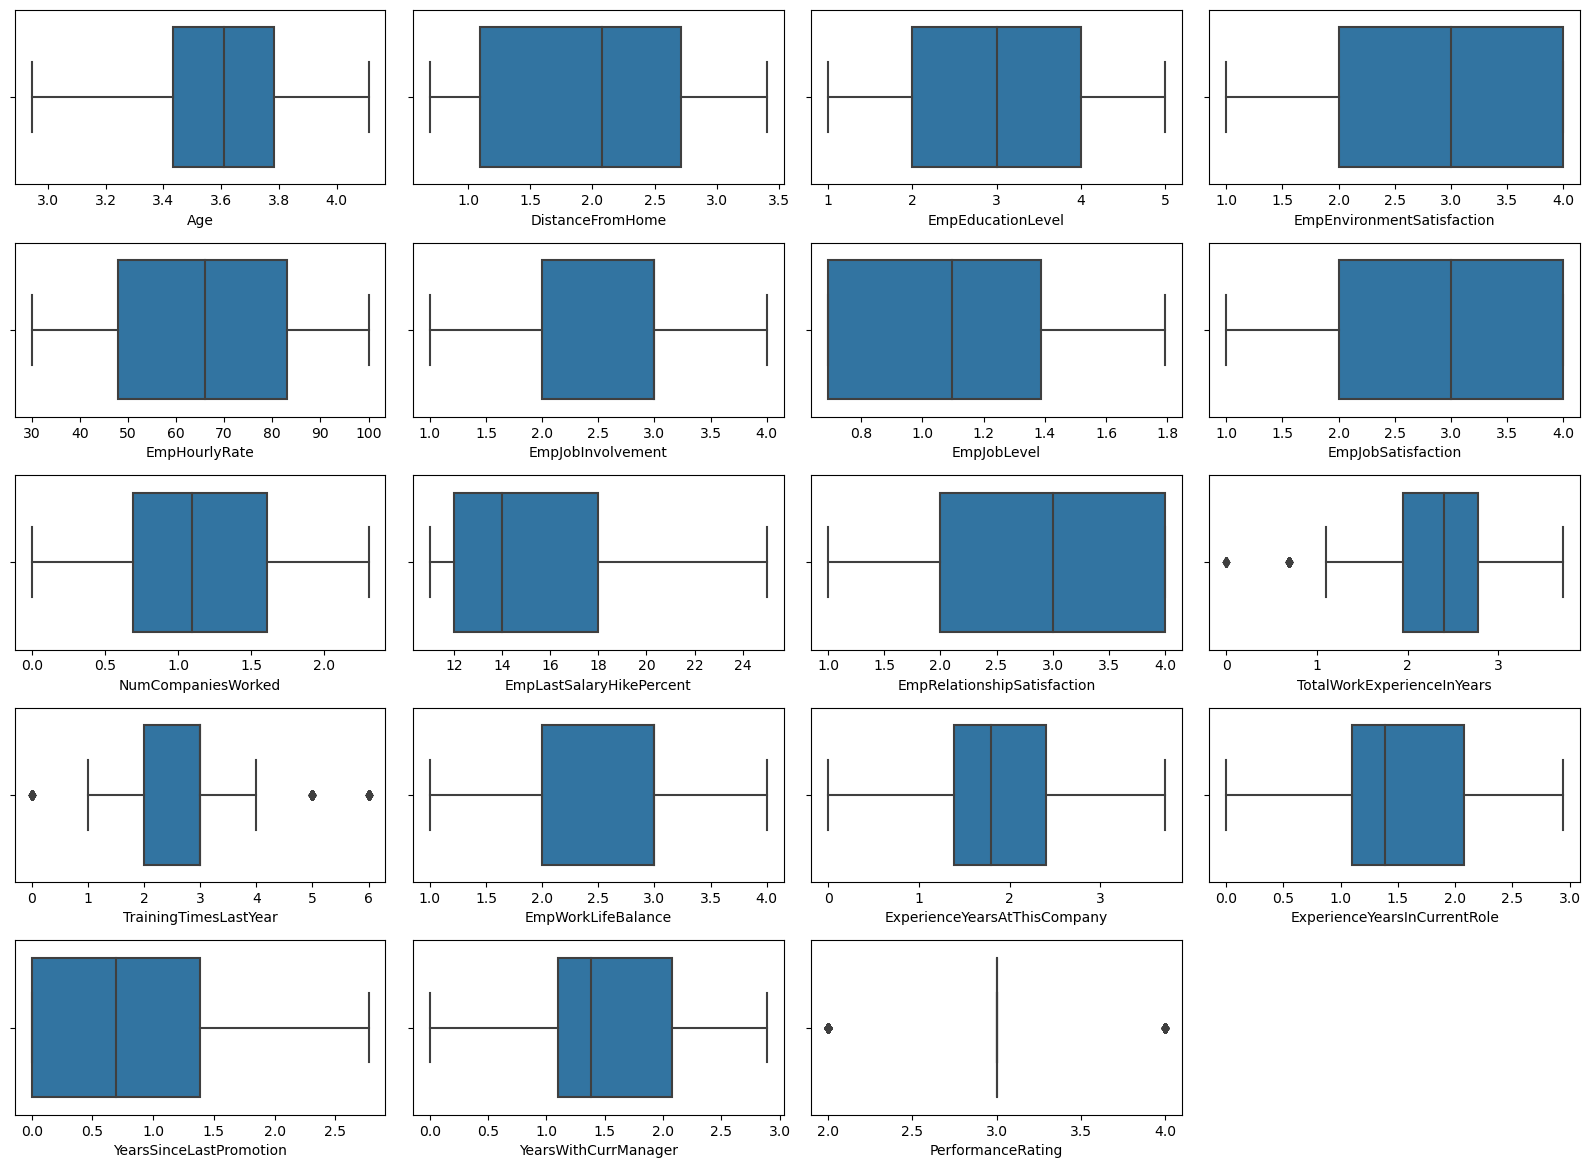

In [34]:
# checking for the outliers
plt.figure(figsize = (16,16))
plot =1
for i in df.select_dtypes(['int','float']):
    plt.subplot(7,4,plot)
    sns.boxplot(x = df[i])
    plot+=1
plt.tight_layout()

In [35]:
outliers  = ['TrainingTimesLastYear','ExperienceYearsInCurrentRole']

In [36]:
for i in df[outliers]:
    print(df.groupby(['PerformanceRating',i]).size())

PerformanceRating  TrainingTimesLastYear
2                  0                          9
                   1                         11
                   2                         70
                   3                         64
                   4                         16
                   5                         16
                   6                          8
3                  0                         32
                   1                         37
                   2                        328
                   3                        295
                   4                         74
                   5                         72
                   6                         36
4                  0                          3
                   1                          8
                   2                         47
                   3                         54
                   4                          8
                   5                         10

# insights:
    
point to be noted that we see a relation of outliers with target column so keep the outliers as its
these outliers can be reduced when doing the scaing

In [217]:
# conversion of categorical data to numarical data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

# looping through all the categorical columns
for i in df.select_dtypes('object'):
    df[i]= lb.fit_transform(df[i])

In [218]:
df.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  3.496508       1                    2              2              5   
1  3.871201       1                    2              2              5   
2  3.713572       1                    1              1              5   
3  3.737670       1                    0              0              3   
4  4.110874       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          2.397895                  3   
1          13                        2          2.708050                  4   
2          13                        1          1.791759                  4   
3           8                        2          2.397895                  4   
4          13                        2          2.833213                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3     1.098612   
1                           4             42                  3     1.098612   
2                           4             48                  2     1.386294   
3                           2             73                  2     1.791759   
4                           1             84                  3     1.098612   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4            0.693147         0                        12   
1                   1            1.098612         0                        12   
2                   1            1.791759         1                        21   
3                   4            1.386294         0                        15   
4                   1            2.197225         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                    2.397895   
1                            4                    3.044522   
2                            3                    3.044522   
3                            2                    3.178054   
4                            4                    2.397895   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                      2.397895   
1                      2                   3                      2.079442   
2                      2                   3                      2.944439   
3                      2                   2                      3.091042   
4                      1                   3                      1.098612   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      2.079442                 0.000000   
1                      2.079442                 0.693147   
2                      2.639057                 0.693147   
3                      1.945910                 2.564949   
4                      1.098612                 1.098612   

   YearsWithCurrManager  Attrition  PerformanceRating  
0              2.197225          0                  3  
1              2.079442          0                  3  
2              2.564949          0                  4  
3              1.945910          0                  3  
4              1.098612          0                  3

In [226]:
# applying the minmaxscaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for i in df.drop('PerformanceRating',axis = 1):
    df[i] = ss.fit_transform(df[[i]])

In [227]:
df

Age    Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0    -0.453275  0.809427            -0.179459       1.236181       1.052350   
1     1.091429  0.809427            -0.179459       1.236181       1.052350   
2     0.441591  0.809427            -0.943112      -0.132285       1.052350   
3     0.540935  0.809427            -1.706766      -1.500751      -0.126754   
4     2.079500  0.809427            -0.179459       1.236181       1.052350   
...        ...       ...                  ...            ...            ...   
1195 -1.130628 -1.235442             0.584195      -1.500751       1.052350   
1196  0.128333  0.809427            -0.943112       1.236181      -1.305857   
1197  1.341359  0.809427             0.584195      -0.132285      -1.305857   
1198 -0.210700 -1.235442             0.584195       1.236181      -1.895409   
1199 -1.597834 -1.235442            -0.943112       1.236181       1.052350   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0       0.833426                 0.596508          0.493416   
1       0.833426                 0.596508          0.853511   
2       0.833426                -0.876351         -0.210318   
3      -0.218658                 0.596508          0.493416   
4       0.833426                 0.596508          0.998828   
...          ...                      ...               ...   
1195    0.833426                -0.876351         -0.681070   
1196    1.254260                 0.596508          0.493416   
1197    1.254260                 0.596508          1.618907   
1198   -1.691577                 0.596508          0.382759   
1199    0.833426                 0.596508         -0.681070   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0              0.103000                    1.177978      -0.543569   
1              1.061145                    1.177978      -1.187042   
2              1.061145                    1.177978      -0.890055   
3              1.061145                   -0.656641       0.347393   
4              1.061145                   -1.573950       0.891870   
...                 ...                         ...            ...   
1195          -1.813288                    1.177978       0.248397   
1196          -0.855144                    1.177978       0.693878   
1197          -1.813288                    1.177978       0.396891   
1198           0.103000                    1.177978      -0.989050   
1199          -0.855144                   -1.573950      -0.048590   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0              0.379608     0.108756            1.151824           -0.586984   
1              0.379608     0.108756           -1.574386            0.025287   
2             -1.035081     0.965055           -1.574386            1.071971   
3             -1.035081     2.171941            1.151824            0.459700   
4              0.379608     0.108756           -1.574386            1.684242   
...                 ...          ...                 ...                 ...   
1195           1.794297     0.108756            1.151824           -0.586984   
1196           1.794297    -1.098130            1.151824            0.459700   
1197           1.794297    -1.098130            0.243087           -0.586984   
1198          -1.035081     0.965055           -0.665650           -0.586984   
1199           0.379608     0.108756            0.243087            1.843341   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0    -0.645573                 -0.889111                     1.185833   
1    -0.645573                 -0.889111                     1.185833   
2     1.549010                  1.594054                     0.255768   
3    -0.645573                 -0.061389                    -0.674297   
4    -0.645573                 -0.337297                     1.185833   
...        ...                       ...                         

In [228]:
x = df.iloc[:,:-1]

In [229]:
y = df.iloc[:,-1]

In [230]:
# spliting the dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [231]:
# checking the shapes of the splitng data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 26)
(300, 26)
(900,)
(300,)


Top 3 important features: ['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion']


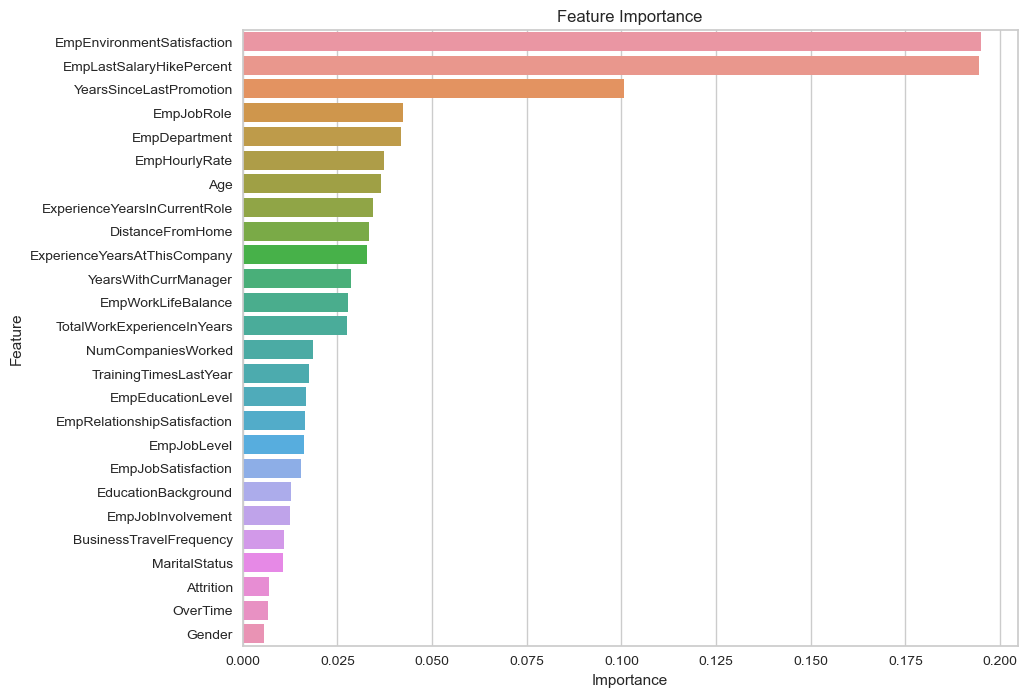

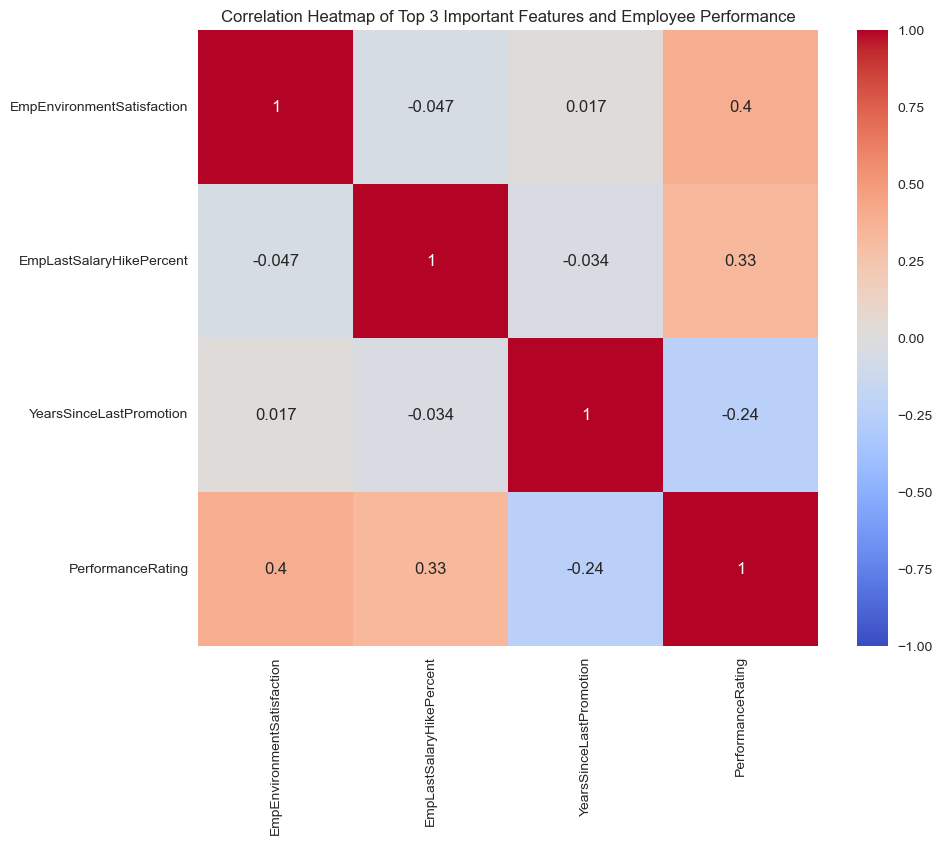

In [232]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X_train, y_train contain your training data
model = RandomForestClassifier()
model.fit(x_train, y_train)
# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

# Sort features by importance and select the top 3
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)
important_features = top_features['Feature'].tolist()

print("Top 3 important features:", important_features)

# Visualization of feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Get the top 3 important features
top_3_features = top_features['Feature'].tolist()

# Create a new DataFrame with the top 3 features and the target variable
top_3_data = df[top_3_features + ['PerformanceRating']]

# Compute the correlation matrix
corr_matrix = top_3_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Top 3 Important Features and Employee Performance')
plt.show()


# 

# 3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

# 

In [233]:
df

Age    Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0    -0.453275  0.809427            -0.179459       1.236181       1.052350   
1     1.091429  0.809427            -0.179459       1.236181       1.052350   
2     0.441591  0.809427            -0.943112      -0.132285       1.052350   
3     0.540935  0.809427            -1.706766      -1.500751      -0.126754   
4     2.079500  0.809427            -0.179459       1.236181       1.052350   
...        ...       ...                  ...            ...            ...   
1195 -1.130628 -1.235442             0.584195      -1.500751       1.052350   
1196  0.128333  0.809427            -0.943112       1.236181      -1.305857   
1197  1.341359  0.809427             0.584195      -0.132285      -1.305857   
1198 -0.210700 -1.235442             0.584195       1.236181      -1.895409   
1199 -1.597834 -1.235442            -0.943112       1.236181       1.052350   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0       0.833426                 0.596508          0.493416   
1       0.833426                 0.596508          0.853511   
2       0.833426                -0.876351         -0.210318   
3      -0.218658                 0.596508          0.493416   
4       0.833426                 0.596508          0.998828   
...          ...                      ...               ...   
1195    0.833426                -0.876351         -0.681070   
1196    1.254260                 0.596508          0.493416   
1197    1.254260                 0.596508          1.618907   
1198   -1.691577                 0.596508          0.382759   
1199    0.833426                 0.596508         -0.681070   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0              0.103000                    1.177978      -0.543569   
1              1.061145                    1.177978      -1.187042   
2              1.061145                    1.177978      -0.890055   
3              1.061145                   -0.656641       0.347393   
4              1.061145                   -1.573950       0.891870   
...                 ...                         ...            ...   
1195          -1.813288                    1.177978       0.248397   
1196          -0.855144                    1.177978       0.693878   
1197          -1.813288                    1.177978       0.396891   
1198           0.103000                    1.177978      -0.989050   
1199          -0.855144                   -1.573950      -0.048590   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0              0.379608     0.108756            1.151824           -0.586984   
1              0.379608     0.108756           -1.574386            0.025287   
2             -1.035081     0.965055           -1.574386            1.071971   
3             -1.035081     2.171941            1.151824            0.459700   
4              0.379608     0.108756           -1.574386            1.684242   
...                 ...          ...                 ...                 ...   
1195           1.794297     0.108756            1.151824           -0.586984   
1196           1.794297    -1.098130            1.151824            0.459700   
1197           1.794297    -1.098130            0.243087           -0.586984   
1198          -1.035081     0.965055           -0.665650           -0.586984   
1199           0.379608     0.108756            0.243087            1.843341   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0    -0.645573                 -0.889111                     1.185833   
1    -0.645573                 -0.889111                     1.185833   
2     1.549010                  1.594054                     0.255768   
3    -0.645573                 -0.061389                    -0.674297   
4    -0.645573                 -0.337297                     1.185833   
...        ...                       ...                         

## performing the feature enginering

<Axes: >

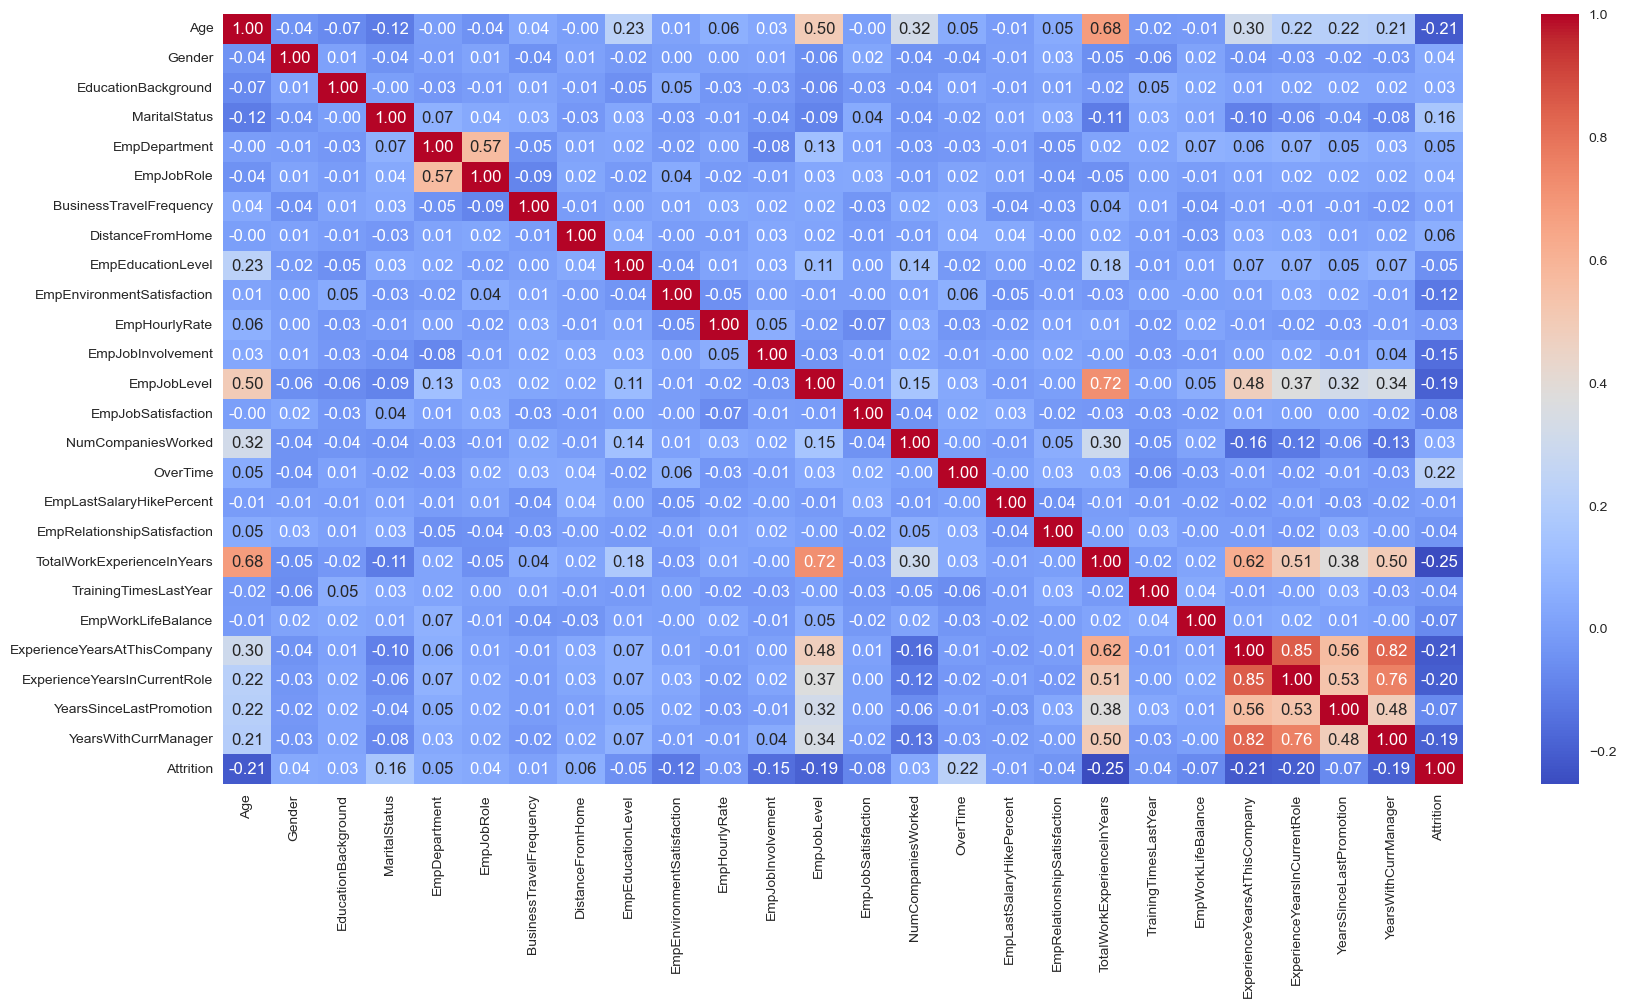

In [234]:
# feature selection
plt.figure(figsize = (20,10))
sns.heatmap(df.drop('PerformanceRating',axis =1).corr(),annot = True,cmap='coolwarm',fmt='.2f')

In [235]:
# trying the variance Threshold method

from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0.2)

var.fit(x,y)

best_feature = x.columns[var.get_support()]

print(best_feature.tolist())

['Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


# observation:
    
when using the feature that obtained after feature selelction there is a decrese in perfromace level 

of the model so i am considering all the feature in the datset to train the model 

In [236]:
# spliting the datset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# checking the shapes of the splited data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(840, 26)
(840,)
(360, 26)
(360,)


In [237]:
# importing the necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [238]:
# creating pipelines for each classifier
pipelines = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    'svm': Pipeline([
        ('classifier', SVC())
    ]),
    'ExtraTreesClassifier': Pipeline([
        ('classifier', ExtraTreesClassifier())
    ])
}

# Training and evaluating each pipeline
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix' : confusion_matrix(y_test,y_pred)
    }

# Display results
for name, result in results.items():
    print(f"Results for {name}:")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print('confusion_matrix')
    print(result['confusion_matrix'])
    print("=" * 30)

Results for logistic_regression:
Accuracy: 0.8472222222222222
Classification Report:
              precision    recall  f1-score   support

           2       0.73      0.67      0.70        52
           3       0.89      0.92      0.91       266
           4       0.67      0.62      0.64        42

    accuracy                           0.85       360
   macro avg       0.76      0.74      0.75       360
weighted avg       0.84      0.85      0.84       360

confusion_matrix
[[ 35  14   3]
 [ 12 244  10]
 [  1  15  26]]
Results for random_forest:
Accuracy: 0.9472222222222222
Classification Report:
              precision    recall  f1-score   support

           2       0.89      0.92      0.91        52
           3       0.97      0.97      0.97       266
           4       0.90      0.83      0.86        42

    accuracy                           0.95       360
   macro avg       0.92      0.91      0.91       360
weighted avg       0.95      0.95      0.95       360

confusion_m

## RandomForestClassifier changing the hyperparameters 

In [241]:
# doing the hyperparameter tuning for the randomforest model
rf = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=20,min_samples_split=15,min_samples_leaf=2,random_state=42)
rf.fit(x_train,y_train)
y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

# checking the performance
print(f'accuracy of train_data : {accuracy_score(y_train,y_pred_train)}')
print(f'accuracy of test_data : {accuracy_score(y_test,y_pred_test)}')

accuracy of train_data : 0.9452380952380952
accuracy of test_data : 0.95


In [242]:
# the checking the mean performace of the model
np.mean(cross_val_score(rf,x,y,cv = 10,scoring='accuracy',n_jobs=-1))

0.9349999999999999

In [243]:
confusion_matrix(y_test,y_pred_test)

array([[ 48,   4,   0],
       [  3, 259,   4],
       [  1,   6,  35]], dtype=int64)

In [244]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           2       0.92      0.92      0.92        52
           3       0.96      0.97      0.97       266
           4       0.90      0.83      0.86        42

    accuracy                           0.95       360
   macro avg       0.93      0.91      0.92       360
weighted avg       0.95      0.95      0.95       360



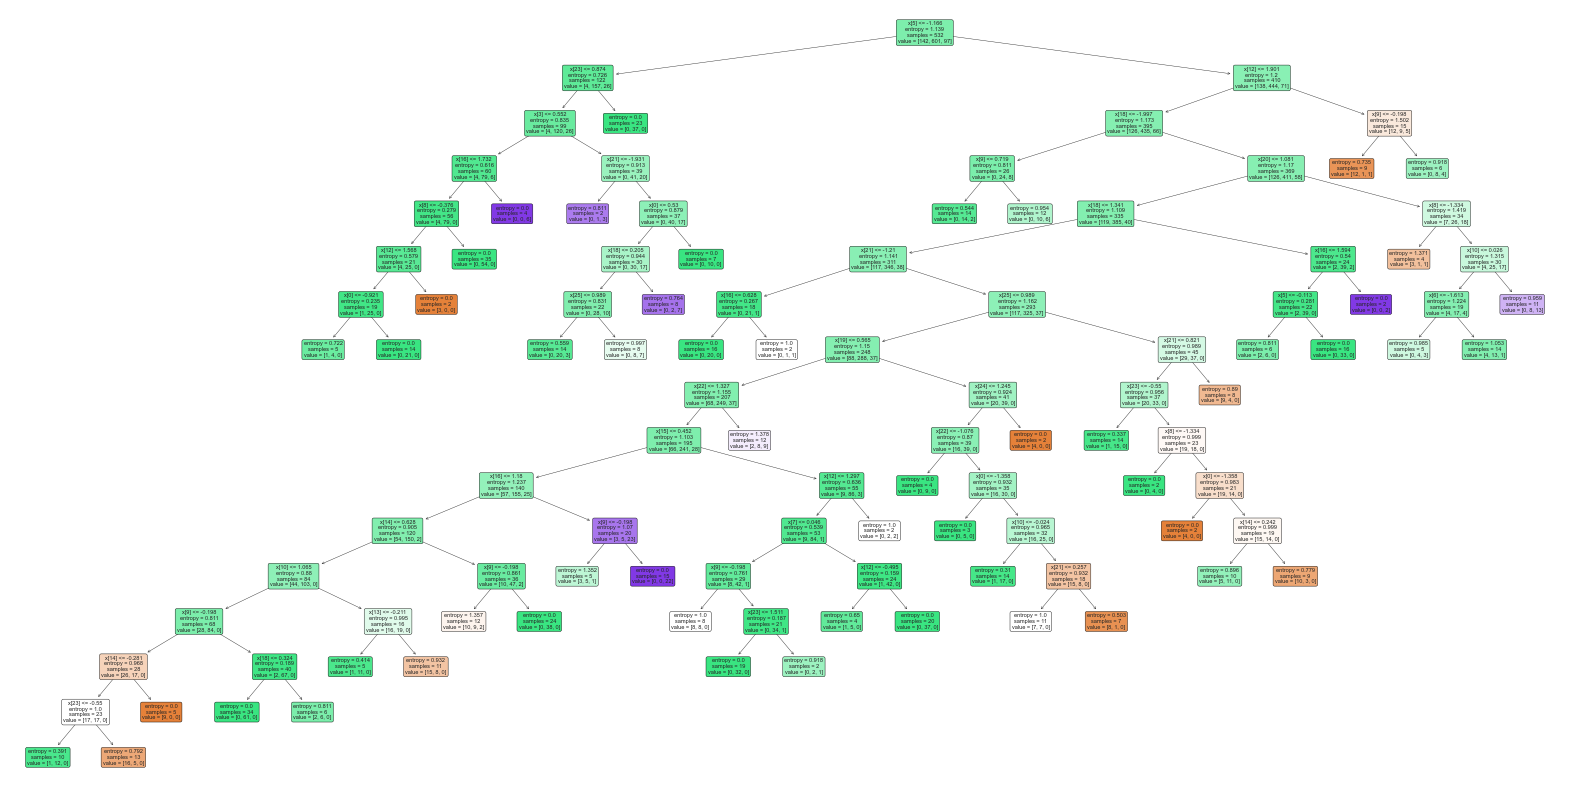

In [245]:
# accesing the individual tree for visualization
tree = rf.estimators_[0]

# importing plot_tree function
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
plot_tree(tree,filled=True,rounded=True,fontsize=4)
plt.show()

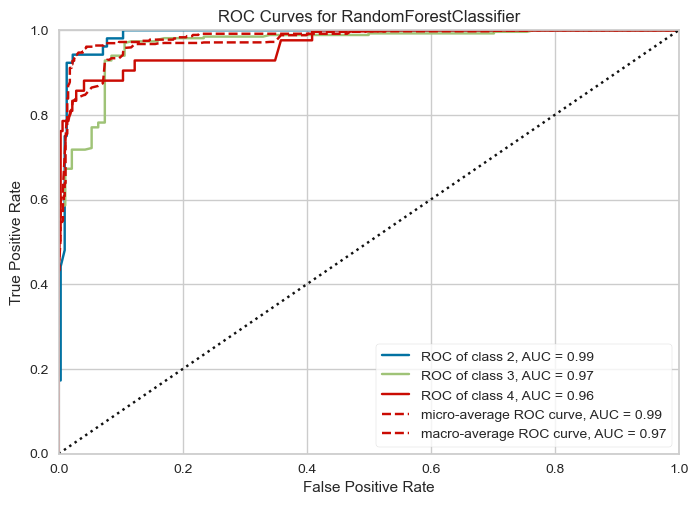

In [246]:
from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
model = RandomForestClassifier(
    n_estimators= 500,
    max_depth= None,
    min_samples_split=3,
    min_samples_leaf= 1,
    max_features= 'log2',
    max_leaf_nodes= None,
    bootstrap= False,
    random_state=42)

visualizer = ROCAUC(model) #model=ec1

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                 
plt.show()
# Finalize and render the figure

## Trained Model prediction

# 

In [248]:
model = rf.predict(x_test)

traine_model = pd.DataFrame({'Model': 'RandomForestClassifier',
                            'Actual_performance':y_test,
                            'Predcited_Perfromance':y_pred_test}).reset_index()
traine_model[:40]

index                   Model  Actual_performance  Predcited_Perfromance
0     198  RandomForestClassifier                   3                      3
1     328  RandomForestClassifier                   3                      3
2      45  RandomForestClassifier                   3                      3
3     263  RandomForestClassifier                   3                      3
4     621  RandomForestClassifier                   3                      3
5     520  RandomForestClassifier                   2                      2
6     186  RandomForestClassifier                   3                      3
7     987  RandomForestClassifier                   3                      3
8    1107  RandomForestClassifier                   3                      3
9    1052  RandomForestClassifier                   3                      3
10    311  RandomForestClassifier                   3                      3
11   1090  RandomForestClassifier                   4                      4
12    303  RandomForestClassifier                   3                      3
13    395  RandomForestClassifier                   3                      3
14    362  RandomForestClassifier                   3                      3
15    443  RandomForestClassifier                   2                      2
16    966  RandomForestClassifier                   3                      3
17    204  RandomForestClassifier                   2                      2
18     52  RandomForestClassifier                   3                      3
19   1051  RandomForestClassifier                   3                      3
20    952  RandomForestClassifier                   2                      2
21    980  RandomForestClassifier                   3                      3
22   1063  RandomForestClassifier                   3                      3
23   1062  RandomForestClassifier                   3                      3
24    981  RandomForestClassifier                   3                      3
25     39  RandomForestClassifier                   3                      3
26    744  RandomForestClassifier                   4                      4
27    202  RandomForestClassifier                   3                      3
28    858  RandomForestClassifier                   3                      3
29   1140  RandomForestClassifier                   4                      4
30      5  RandomForestClassifier                   4                      4
31     18  RandomForestClassifier                   4                      4
32    825  RandomForestClassifier                   3                      3
33    622  RandomForestClassifier                   3                      3
34    580  RandomForestClassifier                   3                      3
35   1126  RandomForestClassifier                   3                      3
36    224  RandomForestClassifier                   3                      3
37    937  RandomForestClassifier                   3                      3
38    811  RandomForestClassifier                   3                      3
39    420  RandomForestClassifier                   2                      2

In [257]:
# checking the prediction by passing a random input_data
input_data = [[3.496508,1,2,2,5,13,2,2.397895,3,4,55,3,1.098612,4,0.693147,0,
                12,4,2.397895,2,2,2.397895,2.079442,0.000000,2.197225,0]]
# applying the standard scaler
ss = StandardScaler()
scaled_input = ss.fit_transform(input_data)

# making the prediction 
out_put = rf.predict(scaled_input)

print(f'the actual prediction is {3} the predicted data is {out_put}')

the actual prediction is 3 the predicted data is [3]


# summary

I have perfromed the model with the certain classification algorithm like Logistic classification,
support vector machine ,Extratree classisifier ,randomForest classifier among the model ,
The Random Forest classifier has the given a good accuracy of 95 % for the test data.
so i choosed the random Forest classifier as a ideal model to create a training model.

# chalanges faced:
- having the categorical data 
- outliers treatement 
- scalling the data and also apply some transfromation
- dimensionality reduction of the data 
- finding the correlated feature 
- handling the multicolinearity 

# conclusion

- RandomForestClassifier model work well for given dataset.
- Test accuracy of this model is 95%
- Train accuracy of this model is 94.5%
- mean score of cross_validation on data is 93.4%
- ROC for class 2{Good Performance Rating} is 99%
- ROC for class 3{Excellent Performance Rating} is 97%
- ROC for class 4{ Performance Rating} is 96%

## 4. Recommendations to improve the employee performance based on insights from analysis

#
##Training and Development:

Offer targeted training programs to address skill gaps.
Encourage continuous learning and development opportunities.

##Work-Life Balance:

Promote flexible working hours and remote work options.
Implement wellness programs to reduce stress and burnout.

##Recognition and Rewards:

Recognize and reward high-performing employees regularly.
Create a transparent and fair reward system.

##Career Growth:

Provide clear career advancement paths.
Offer mentorship and coaching to support employee growth.

##Feedback Mechanisms:

Implement regular performance reviews with constructive feedback.
Encourage open communication and feedback channels.

##Work Environment:

Foster a positive and inclusive work culture.
Ensure employees have the necessary resources and tools to perform their jobs efficiently.